In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [9]:
#read the CSV file into a dataframe
df = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/Classic_no_grouping_no_remap_100Files.csv')

# select columns that you want to keep
columns_to_keep = ['Protein IDs', 'Q-value', 'Score']
new_df = df[columns_to_keep]
# print the new dataframe
print(new_df)
#print(new_df) 
new_df.to_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/ProteinIDs_classic_no_grouping_no_remap_100Files_withScore.csv', index=False)


                     Protein IDs   Q-value     Score
0           sp|Q13643|FHL3_HUMAN  0.000375  3.999922
1            sp|P49327|FAS_HUMAN  0.000375  3.999904
2          sp|P20700|LMNB1_HUMAN  0.000375  3.999904
3           sp|Q9Y266|NUDC_HUMAN  0.000375  3.999891
4           sp|P10809|CH60_HUMAN  0.000375  3.999831
...                          ...       ...       ...
6251  REV__sp|Q13410|BT1A1_HUMAN  0.298318  0.340795
6252    REV__sp|P12270|TPR_HUMAN  0.298526  0.334564
6253   REV__sp|O95994|AGR2_HUMAN  0.298734  0.332450
6254  REV__sp|P48200|IREB2_HUMAN  0.298879  0.304856
6255       sp|Q96D09|GASP2_HUMAN  0.298879  0.303649

[6256 rows x 3 columns]


In [ ]:
#Doing this for multiple CSV Files to form ProteinIDs

In [10]:
import os
import pandas as pd

# set the folder path where CSV files are located
folder_path = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/'

# loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # read in the CSV file
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # select columns that you want to keep
        columns_to_keep = ['Protein IDs', 'Q-value', 'Score']
        new_df = df[columns_to_keep]

        # write out the new CSV file with the selected columns
        new_filename = 'ProteinIDs_' + filename[:-4] + '_withScore.csv' # modify the filename as needed
        new_file_path = os.path.join(folder_path, new_filename)
        new_df.to_csv(new_file_path, index=False)

In [11]:
import pandas as pd
import os

# Define the path to the folder containing the CSV files
folder_path = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/'

# Loop through all the CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(os.path.join(folder_path, file_name))
        
        # Split the column by '|', but only keep the first two splits if there are more than 2
        split_col = df['Protein IDs'].str.split('|', n=2, expand=True)
        
        # Rename the new columns
        split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']
        
        # Concatenate the original DataFrame and the new columns
        new_df = pd.concat([df['Q-value'], split_col], axis=1)
        
        # Write the new DataFrame to a new CSV file
        new_file_name = 'Separate' + file_name
        new_df.to_csv(os.path.join(folder_path, new_file_name), index=False)

In [13]:
#Checking if the SeparateProteinIDs_{method}_{number_of_raw_files}.csv are in correct format
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packagesh/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/SeparateProteinIDs_Picked_protein_group_no_remap_4000Files_withScore.csv')
print(df)

        Q-value Protein Type       Protein Uniprot  \
0      0.000327           sp                P35579   
1      0.000327           sp                Q9Y277   
2      0.000327           sp                Q9NRL2   
3      0.000327           sp                Q16548   
4      0.000327           sp                Q92835   
...         ...          ...                   ...   
31231  0.507363      REV__sp              Q9NSC5-2   
31232  0.507363           sp              Q9Y6A2-3   
31233  0.507363           pI  c2riboseqorf50_HUMAN   
31234  0.507407      REV__sp              Q6ISS4-2   
31235  0.507407      REV__sp              Q8N884-2   

                                           Protein Label  
0                      MYH9_HUMAN;sp|P35579-2|MYH9_HUMAN  
1                    VDAC3_HUMAN;sp|Q9Y277-2|VDAC3_HUMAN  
2                    BAZ1A_HUMAN;sp|Q9NRL2-2|BAZ1A_HUMAN  
3                    B2LA1_HUMAN;sp|Q16548-2|B2LA1_HUMAN  
4      SHIP1_HUMAN;sp|Q92835-2|SHIP1_HUMAN;sp|Q92835-...

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# read in the two csv files
csv1 = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/SeparateProteinIDs_Picked_protein_group_no_remap_4000Files_withScore.csv')
csv2 = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/Uniprot_Human_Proteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot')

print(merged_csv)
# save the merged csv to a file
#merged_csv.to_csv('MergedHumanProteome-ClassicNoGroupingNoRemap_100.csv', index=False)

        Q-value Protein Type Protein Uniprot  \
0      0.000327           sp          P35579   
1      0.000327           sp          Q9Y277   
2      0.000327           sp          Q9NRL2   
3      0.000327           sp          Q16548   
4      0.000327           sp          Q92835   
...         ...          ...             ...   
18632  0.506895      REV__sp          P0DTE2   
18633  0.506895           sp          Q17RA5   
18634  0.507007           sp          Q9BWQ8   
18635  0.507071      REV__sp          A6NHG9   
18636  0.507071           sp          A6NJR5   

                                           Protein Label  \
0                      MYH9_HUMAN;sp|P35579-2|MYH9_HUMAN   
1                    VDAC3_HUMAN;sp|Q9Y277-2|VDAC3_HUMAN   
2                    BAZ1A_HUMAN;sp|Q9NRL2-2|BAZ1A_HUMAN   
3                    B2LA1_HUMAN;sp|Q16548-2|B2LA1_HUMAN   
4      SHIP1_HUMAN;sp|Q92835-2|SHIP1_HUMAN;sp|Q92835-...   
...                                                  ...   
186

In [ ]:
#seeing unmerged rows from SeparateProteinIDs_Picked_protein_group_no_remap_4000Files.

In [20]:
# import pandas as pd

# read in the two csv files
csv1 = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/SeparateProteinIDs_Picked_protein_group_no_remap_4000Files_withScore.csv')
csv2 = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/Uniprot_Human_Proteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot', how='outer', indicator=True)

# filter to only include rows where _merge is left_only
unmerged_csv = merged_csv[merged_csv['_merge'] == 'left_only']

print(unmerged_csv)
unmerged_csv.to_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/MergedHumanProteome-Picked_protein_group_no_remap_4000Files.csv', index=False)

        Q-value Protein Type       Protein Uniprot  \
10     0.000327           sp              P30044-2   
31     0.000327           sp              Q8WTV0-4   
38     0.000327           sp              O00154-4   
102    0.000327           sp              Q02880-2   
116    0.000327           sp              P35658-4   
...         ...          ...                   ...   
31231  0.507363      REV__sp              Q9NSC5-2   
31232  0.507363           sp              Q9Y6A2-3   
31233  0.507363           pI  c2riboseqorf50_HUMAN   
31234  0.507407      REV__sp              Q6ISS4-2   
31235  0.507407      REV__sp              Q8N884-2   

                                           Protein Label Protein names  \
10     PRDX5_HUMAN;sp|P30044-3|PRDX5_HUMAN;sp|P30044-...           NaN   
31     SCRB1_HUMAN;sp|Q8WTV0-2|SCRB1_HUMAN;sp|Q8WTV0-...           NaN   
38     BACH_HUMAN;sp|O00154-2|BACH_HUMAN;sp|O00154-3|...           NaN   
102                    TOP2B_HUMAN;sp|Q02880|TOP2B_HUMA

# Counting number of isoforms unmerged from the Human Proteome for Picked Protein Group No Remap 4000Files

In [19]:
import pandas as pd
import re

# read in the unmerged csv1 dataframe
unmerged_csv = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/MergedHumanProteome-Picked_protein_group_no_remap_4000Files.csv')

# extract the names and count of isoforms
isoforms = []
for protein_id in unmerged_csv['Protein Uniprot']:
    matches = re.findall(r'(\w+-\d+)', protein_id)
    if matches:
        isoforms.extend(matches)
        
isoform_count = len(isoforms)
unique_isoforms = set(isoforms)

print(f'Total number of isoforms: {isoform_count}')
print(f'Unique isoforms: {unique_isoforms}')


Total number of isoforms: 5743
Unique isoforms: {'Q9H3U1-2', 'Q8IZS8-3', 'Q12906-5', 'Q9BXP8-2', 'Q5XG92-8', 'O14682-2', 'O15068-10', 'Q9H7C9-2', 'Q12955-5', 'O43581-6', 'O14511-5', 'Q0ZGT2-2', 'A6NFU8-2', 'Q03405-2', 'O94993-2', 'Q9NVQ4-3', 'Q9Y566-2', 'A2VEC9-2', 'Q86UV5-5', 'Q9UNY4-2', 'Q8N268-2', 'Q5SNV9-2', 'Q03181-2', 'Q86UP8-3', 'Q96PC5-13', 'Q8IU85-2', 'Q6NUP7-2', 'P17693-4', 'Q5VW22-2', 'P21860-2', 'Q8NDA2-2', 'Q9Y2N7-4', 'P01242-4', 'Q9H6Z4-2', 'Q9UHC9-4', 'O75469-7', 'Q8TES7-3', 'P52788-2', 'Q96EP0-2', 'Q8NFU3-4', 'Q5XG92-7', 'O94979-2', 'O15381-5', 'O60931-2', 'A8MW92-4', 'O00292-2', 'P20340-4', 'Q9Y6P5-2', 'Q8NDF8-5', 'Q9HA47-2', 'Q9H1N7-3', 'Q8N8K9-2', 'Q96GE6-5', 'P06241-2', 'Q8TF17-3', 'Q9NRI5-11', 'Q8WYL5-5', 'P60323-2', 'Q9BZ71-3', 'Q58EX2-2', 'Q8IZD2-3', 'Q8NB59-5', 'A8MTA8-2', 'Q12955-4', 'Q96GE4-2', 'Q8IU80-2', 'P50990-3', 'P27361-3', 'Q15599-2', 'P78317-2', 'Q9H0E9-2', 'Q9Y232-2', 'P10072-2', 'Q9UPY3-2', 'Q9Y2E6-2', 'Q9Y666-2', 'P54750-4', 'Q92847-2', 'Q8WXF7-2', 

In [ ]:
#Counting number of isoforms unmerged from the Human Proteome for all the raw Files 

In [ ]:
import os
import pandas as pd
import re

# set the folder path containing the CSV files to merge
folder_path = ('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/')

# read in the human proteome CSV file
human_proteome_csv = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Uniprot_Human_Proteome.csv')

# loop through all CSV files in the folder and merge them with the human proteome CSV file
merged_csv = human_proteome_csv.copy()
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        csv_file = pd.read_csv(os.path.join(folder_path, file_name))
        merged_csv = pd.merge(merged_csv, csv_file, on='Protein Uniprot', how='outer')

# filter to only include rows where _merge is left_only
unmerged_csv = merged_csv[merged_csv['_merge'] == 'left_only']

# group the unmerged rows by the original file names and extract the isoforms and their counts
isoform_counts = {}
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        csv_file = pd.read_csv(os.path.join(folder_path, file_name))
        file_unmerged_csv = unmerged_csv[unmerged_csv[file_name + '._merge'] == 'left_only']
        isoforms = []
        for protein_id in file_unmerged_csv['Protein Uniprot']:
            matches = re.findall(r'(\w+-\d+)', protein_id)
            if matches:
                isoforms.extend(matches)
        isoform_counts[file_name] = {'total': len(isoforms), 'unique': len(set(isoforms)), 'isoforms': isoforms}

# print the isoform counts for each file
for file_name, counts in isoform_counts.items():
    print(f'{file_name}:')
    print(f'Total number of isoforms: {counts["total"]}')
    print(f'Unique isoforms: {counts["unique"]}')
    print(f'Isoforms: {counts["isoforms"]}')


/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_89801/1900765855.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Protein Type_x', 'Q-value_x', 'Protein Label_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_csv = pd.merge(merged_csv, csv_file, on='Protein Uniprot', how='outer')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_89801/1900765855.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Protein Type_x', 'Q-value_x', 'Protein Label_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_csv = pd.merge(merged_csv, csv_file, on='Protein Uniprot', how='outer')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_89801/1900765855.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Protein Type_x', 'Q-value_x', 'Protein Label_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_csv 

In [1]:
import pandas as pd
import os
import re

# set the directory where the CSV files are located
csv_dir = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/'

# read in the human proteome csv file
human_proteome_csv = pd.read_csv(os.path.join(csv_dir, '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Uniprot_Human_Proteome.csv'))

# create an empty dataframe to store unmerged rows and isoforms
all_unmerged_csv = pd.DataFrame(columns=['Protein Uniprot'])

# loop through all CSV files in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.endswith('.csv') and csv_file != 'Uniprot_Human_Proteome.csv':
        # read in the CSV file
        csv = pd.read_csv(os.path.join(csv_dir, csv_file))
        
        # merge the CSV file with the human proteome csv file on the 'Protein Uniprot' column
        merged_csv = pd.merge(csv, human_proteome_csv, on='Protein Uniprot', how='outer', indicator=True)
        
        # filter to only include rows where _merge is left_only
        unmerged_csv = merged_csv[merged_csv['_merge'] == 'left_only']
        
        # add the unmerged rows to the all_unmerged_csv dataframe
        all_unmerged_csv = pd.concat([all_unmerged_csv, unmerged_csv], ignore_index=True)
        
        # extract the names of isoforms using str.extractall and add them to the isoforms list
        isoforms = unmerged_csv['Protein Uniprot'].str.extractall(r'(\w+-\d+)').iloc[:, 0].tolist()
        
        isoform_count = len(isoforms)
        unique_isoforms = set(isoforms)

        print(f'For {csv_file}:')
        print(f'Total number of isoforms: {isoform_count}')
        print(f'Unique isoforms: {unique_isoforms}')
        
# save the all_unmerged_csv dataframe to a CSV file
all_unmerged_csv.to_csv(os.path.join(csv_dir, '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/MergedHumanProteomeIsoforms.csv'), index=False)

For SeparateProteinIDs_Picked_protein_group_no_remap_2000Files_withScore.csv:
Total number of isoforms: 4067
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'Q86XX4-4', 'P43121-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9H172-4', 'Q96J94-3', 'Q6TFL3-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95214-2', 'Q14BN4-4', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O60333-2', 'O15084-2', 'Q14524-5', 'Q9NX78-2', 'Q9Y215-6', 'Q6WRX3-2', 'P0DTL6-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q02224-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'P45984-5', 'Q96LC7-3', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'Q9UBS5-3', 'O75771-6', 'P19544-7', 'P98198-3', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q4G0X9-5', 'Q8IXL7-2', 'Q8WWT9-4', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q1

For SeparateProteinIDs_Savitski_no_remap_1200Files_withScore.csv:
Total number of isoforms: 4271
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q9UL16-2', 'Q96RF0-3', 'Q8

For SeparateProteinIDs_Classic_no_grouping_no_remap_200Files_withScore.csv:
Total number of isoforms: 775
Unique isoforms: {'Q9H7T0-2', 'Q96LX7-5', 'P60660-2', 'A0A1B0GVS7-2', 'P50851-2', 'Q14318-2', 'Q96JN0-3', 'Q01113-3', 'Q8IY67-2', 'Q401N2-3', 'Q8WXC6-1', 'Q9P2M1-2', 'Q5W0U4-2', 'Q01543-2', 'A0PJY2-3', 'P09496-3', 'Q66K74-2', 'Q8NF91-9', 'Q9H0P0-1', 'Q6ZMN7-4', 'Q96QU1-6', 'Q6ZQW0-2', 'Q8TAP4-3', 'Q96H22-2', 'Q5VZ19-2', 'P47736-3', 'Q13495-3', 'Q33E94-4', 'Q8NCT3-6', 'Q8WTV1-4', 'Q86WI3-3', 'Q3ZCV2-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q9H074-3', 'O15539-2', 'O75461-2', 'Q0VDD8-3', 'P29692-2', 'A9Z1Z3-4', 'P17542-2', 'P67812-3', 'Q9NQW5-2', 'Q5T8P6-2', 'Q8IV35-2', 'P17010-2', 'Q00325-2', 'Q8IXL7-2', 'Q8NEZ3-2', 'Q9UKJ3-3', 'Q9NWV8-2', 'Q969F9-2', 'O00744-2', 'P40855-6', 'Q9Y446-2', 'Q01082-3', 'Q9P206-2', 'Q3KRA9-3', 'Q5JPI3-2', 'Q96KP6-3', 'O43324-2', 'Q8N307-3', 'Q96PE1-2', 'P28335-2', 'Q96PV0-3', 'Q96CW1-2', 'Q9NVL1-2', 'Q92879-5', 'P49368-2', 'Q86SQ6-1', 'Q9H6L2-2', 'Q13972-2', 'Q7RTR2-

For SeparateProteinIDs_Savitski_no_remap_1700Files_withScore.csv:
Total number of isoforms: 5239
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'P51878-5', 'Q8IZ41-2', 'Q9P2N2-2', 'Q14439-2', 'Q68G75-6', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'Q96B96-2', 'Q9UBT6-2', 'Q9H0V9-2', 'Q9NTX7-2', 'Q9HCE1-3', 'A8K0R7-5', 'Q96P44-2', 'P57103-5', 'Q8NCV1-2', 'P55259-3', 'P19

For SeparateProteinIDs_Classic_no_grouping_no_remap_700Files_withScore.csv:
Total number of isoforms: 3199
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q04671-3', 'P10242-10', 'P01100-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'O14713-2', 'Q5JPI3-2', 'Q2V2M9-4', 'Q6ZUS6-5', 'P13497-4', 'Q8ND

For SeparateProteinIDs_Savitski_no_remap_2000Files_withScore.csv:
Total number of isoforms: 6279
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'P41223-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'Q969W3-2', 'P51878-5', 'Q8IZ41-2', 'Q6NUS6-5', 'Q9P2N2-2', 'Q14439-2', 'P78410-3', 'Q68G75-6', 'P22736-2', 'Q9H7H0-3', 'A8M

For SeparateProteinIDs_Classic_no_grouping_no_remap_800FIles_withScore.csv:
Total number of isoforms: 3565
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'P10242-10', 'P01100-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'O14713-2', 'Q5JP

For SeparateProteinIDs_Picked_protein_group_no_remap_1200Files_withScore.csv:
Total number of isoforms: 2774
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'O60313-2', 'P50851-2', 'P43121-2', 'Q14318-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'O15350-9', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'P22694-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'Q8N961-2', 'O60879-2', 'Q96H22-3', 'Q6ZV65-2', 'Q9NR11-2', 'Q70YC5-4', 'P49368-2', 'P36402-4', 'O00445-2', 'Q5VVJ2-3', 'Q8

For SeparateProteinIDs_Savitski_no_remap_1800Files_withScore.csv:
Total number of isoforms: 5643
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'Q969W3-2', 'P51878-5', 'Q8IZ41-2', 'Q9P2N2-2', 'Q14439-2', 'Q68G75-6', 'P22736-2', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'P53675-2', 'Q96B96-2', 'Q9UBT6-2', 'Q9H0V9-2', 'Q9NTX7-2', 'Q9H

For SeparateProteinIDs_Picked_protein_group_no_remap_1700Files_withScore.csv:
Total number of isoforms: 3374
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'P43121-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9H172-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O60333-2', 'O15084-2', 'Q6WRX3-2', 'Q9NX78-2', 'Q9Y215-6', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8N1S5-2', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'Q8

For SeparateProteinIDs_Picked_protein_group_no_remap_800Files_withScore.csv:
Total number of isoforms: 2203
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'P50851-2', 'Q14318-2', 'P24530-3', 'P35348-6', 'P11464-4', 'Q01543-2', 'Q9BQK8-2', 'Q8NF91-9', 'Q86TP1-5', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O75865-4', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'O43497-8', 'O94929-3', 'P10242-10', 'P01100-2', 'Q8IXL7-2', 'Q8IWZ3-6', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q6ZUS6-5', 'P14859-6', 'Q9BYB0-3', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'O60879-2', 'Q6ZV65-2', 'Q70YC5-4', 'P49368-2', 'Q8NEY1-5', 'P36402-4', 'Q7LFL8-2', 'Q5VVJ2-3', 'Q8NCX0-2', 'Q9H6L2-2', 'Q9NQW8-2', 'O75122-3', 'Q9NX94-2', 'Q76KX8-2', 'P04085-2', 'P48067-2', 'Q8IUR7-6', 'Q96I27-2', 'Q5VWK5-7', 'Q9HC

For SeparateProteinIDs_Savitski_no_remap_900FIles_withScore.csv:
Total number of isoforms: 3548
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'O14

For SeparateProteinIDs_Classic_no_grouping_no_remap_1100Files_withScore.csv:
Total number of isoforms: 4494
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'Q96LX7-5', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q9UL16-2', 'Q96RF0-3', 'Q8I

For SeparateProteinIDs_Classic_no_grouping_no_remap_5000Files_withScore.csv:
Total number of isoforms: 12496
Unique isoforms: {'O43670-3', 'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'Q9C0H6-2', 'Q13574-7', 'P49758-16', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'P48059-4', 'Q9H8V3-3', 'Q96J94-3', 'O43913-2', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q96PV7-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q9Y215-3', 'Q16643-3', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9H6X5-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9U

For SeparateProteinIDs_Classic_no_grouping_no_remap_1400Files_withScore.csv:
Total number of isoforms: 5365
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'Q13574-7', 'P43121-2', 'Q9BPX6-5', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43

For SeparateProteinIDs_Savitski_no_remap_6000Files_withScore.csv:
Total number of isoforms: 10970
Unique isoforms: {'O43670-3', 'Q96LX7-5', 'A0A1B0GVS7-2', 'Q4LE39-2', 'Q9NQQ7-3', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'Q9C0H6-2', 'Q13574-7', 'P49758-16', 'Q07890-2', 'A8K2U0-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'P48059-4', 'Q96RK4-2', 'Q9H8V3-3', 'Q96J94-3', 'O43913-2', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9ULJ3-2', 'Q96PV7-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q9Y215-3', 'Q16643-3', 'Q8TDF5-1', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q6ZN01-3', 'Q9H2D6-2', 'Q9BZP3-3', 'P08621-3', 'Q9BW11-4', 'Q8N961-2', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9

For SeparateProteinIDs_Savitski_no_remap_1900Files_withScore.csv:
Total number of isoforms: 5998
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'P41223-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'Q969W3-2', 'P51878-5', 'Q8IZ41-2', 'Q6NUS6-5', 'Q9P2N2-2', 'Q14439-2', 'P78410-3', 'Q68G75-6', 'P22736-2', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'P53

For SeparateProteinIDs_Classic_no_grouping_no_remap_900Files_withScore.csv:
Total number of isoforms: 3913
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1

For SeparateProteinIDs_Picked_protein_group_no_remap_1300Files_withScore.csv:
Total number of isoforms: 2902
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'O60313-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'O15350-9', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'Q8N961-2', 'O60879-2', 'Q96H22-3', 'Q6ZV65-2', 'Q9NR11-2', 'Q70YC5-4', 'P49368-2', 'P3

For SeparateProteinIDs_Savitski_no_remap_800Files_withScore.csv:
Total number of isoforms: 3254
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'P10242-10', 'P01100-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'O14713-2', 'Q5JPI3-2', 'Q2V

For SeparateProteinIDs_Picked_protein_group_no_remap_1600Files_withScore.csv:
Total number of isoforms: 3291
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'P43121-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9H172-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'Q8N961-2', 'P0

For SeparateProteinIDs_Picked_protein_group_no_remap_900Files_withScore.csv:
Total number of isoforms: 2360
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'P50851-2', 'P43121-2', 'Q14318-2', 'P24530-3', 'P35348-6', 'P11464-4', 'Q01543-2', 'Q9BQK8-2', 'Q8NF91-9', 'Q86TP1-5', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q8IWZ3-6', 'Q13402-8', 'Q14192-2', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'O60879-2', 'Q96H22-3', 'Q6ZV65-2', 'Q9NR11-2', 'Q70YC5-4', 'P49368-2', 'Q8NEY1-5', 'P36402-4', 'Q7LFL8-2', 'Q5VVJ2-3', 'Q8NCX0-2', 'Q96A59-3', 'Q9NQW8-2', 'O75122-3', 'Q9NX94-2', 'Q6IPM2-2', 'Q76KX8-2', 'P04085-2', 'P48067-2', 'Q8IUR7-6', 'Q96I

For SeparateProteinIDs_Classic_no_grouping_no_remap_3000Files_withScore.csv:
Total number of isoforms: 9588
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'P49758-16', 'Q13574-7', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'Q9H8V3-3', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'O15204-2', 'Q96D71-2', 'P42892-2', 'Q8N443-3', 'P155

For SeparateProteinIDs_Picked_protein_group_no_remap_1900FIles_withScore.csv:
Total number of isoforms: 3891
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'Q86XX4-4', 'P43121-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9H172-4', 'Q96J94-3', 'Q6TFL3-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O60333-2', 'O15084-2', 'Q14524-5', 'Q9NX78-2', 'Q9Y215-6', 'Q6WRX3-2', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'Q96LC7-3', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'P98198-3', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q4G0X9-5', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8

For SeparateProteinIDs_Picked_protein_group_no_remap_600Files_withScore.csv:
Total number of isoforms: 1852
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'P35348-6', 'Q01543-2', 'Q9NPH0-2', 'Q9BQK8-2', 'Q8NF91-9', 'Q86TP1-5', 'Q6ZMN7-4', 'Q96H22-2', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q10567-3', 'Q9BXT4-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'Q01860-2', 'Q9NQW5-2', 'O94929-3', 'P10242-10', 'P01100-2', 'Q8IXL7-2', 'Q8IWZ3-6', 'Q13402-8', 'Q14192-2', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q9Y4I1-3', 'P14859-6', 'Q9BYB0-3', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'Q6ZV65-2', 'P49368-2', 'Q8NEY1-5', 'P36402-4', 'Q7LFL8-2', 'Q5VVJ2-3', 'Q8NCX0-2', 'Q9H6L2-2', 'O75122-3', 'Q9NX94-2', 'Q6PGN9-3', 'P04085-2', 'P48067-2', 'Q8IUR7-6', 'Q5VWK5-7', 'P53370-2', 'Q13239-5', 'P16471-9', 'P43403-3', 'Q8WXS8-3', 'Q6A555-2', 'C9JBD0-2', 'A0FGR8-6', 'O75400-3', 'Q96C03-2', 'P155

For SeparateProteinIDs_Classic_no_grouping_no_remap_300Files_withScore.csv:
Total number of isoforms: 1209
Unique isoforms: {'Q9H7T0-2', 'P78358-2', 'P60660-2', 'A0A1B0GVS7-2', 'Q8IZ96-14', 'Q07812-6', 'Q96LX7-5', 'Q7Z7G0-4', 'P50851-2', 'P43121-2', 'Q14318-2', 'Q96JN0-3', 'Q01113-3', 'Q3SXY7-2', 'Q86XL3-3', 'Q8IY67-2', 'Q7Z304-2', 'Q9NZC7-6', 'Q6IWH7-2', 'Q8WXC6-1', 'Q401N2-3', 'Q9P2M1-2', 'P81877-4', 'P04406-2', 'Q5W0U4-2', 'Q9H1B4-6', 'Q96MT7-1', 'Q08722-3', 'Q01543-2', 'A0PJY2-3', 'P09496-3', 'Q66K74-2', 'Q8NF91-9', 'Q9H0P0-1', 'Q3ZCX4-3', 'Q96QU1-6', 'Q6ZMN7-4', 'Q8TAP4-3', 'Q96H22-2', 'Q9H9B1-2', 'P47736-3', 'Q13495-3', 'Q33E94-4', 'Q5VZ19-2', 'Q8NCT3-6', 'O15375-2', 'Q8WTV1-4', 'Q86WI3-3', 'Q3ZCV2-2', 'O15084-2', 'Q8TBY8-1', 'Q9NX78-2', 'Q8NCC5-3', 'Q8WWR9-2', 'Q9H074-3', 'Q6ISS4-2', 'O15539-2', 'Q9Y371-2', 'Q9NZM1-3', 'O75461-2', 'Q0VDD8-3', 'Q8TED0-3', 'P13232-3', 'Q9UN36-3', 'P29692-2', 'A9Z1Z3-4', 'O00422-2', 'O75771-6', 'P67812-3', 'P17542-2', 'O60573-2', 'Q9NQW5-2', 'Q86VB

For SeparateProteinIDs_Picked_protein_group_no_remap_6000Files_withScore.csv:
Total number of isoforms: 7761
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q9H2X0-2', 'Q13574-7', 'P35348-6', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q9ULJ3-2', 'Q96PV7-3', 'Q8TAX9-1', 'O60907-2', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q2VPA4-3', 'P07202-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'O75771-6', 'Q01860-2', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q8IXL7-2', 'O60271-9', 'Q9Y215-3', 'P62633-6', 'Q8TDF5-1', 'O00469-2', 'O76081-3', 'Q8N4L8-2', 'Q6ZN01-3', 'Q9H2D6-2', 'Q9BZP3-3', 'P08621-3', 'Q9BW11-4', 'Q8N961-2', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9H6X5-2', 'Q9Y303-2', 'Q9NXL9-2', 'Q86X27-3', 'Q9UBQ7-2', 'Q8IUR7-6', 'Q9NYF5-3', 'Q13239-5', 'Q13007-4', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'Q8TEH3-2', 'P19021-3', 'P42892-2', 'Q96D71-2', 'P46087-3', 'Q8N443-3', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q03001-11', 'Q96PS8-2', 'Q6AZY7-2', 'Q68D91-2', 'Q8N

For SeparateProteinIDs_Savitski_no_remap_1300Files_withScore.csv:
Total number of isoforms: 4479
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8WWT9-4', 'Q9

For SeparateProteinIDs_Savitski_no_remap_700Files_withScore.csv:
Total number of isoforms: 2939
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q04671-3', 'P10242-10', 'P01100-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'O14713-2', 'Q5JPI3-2', 'Q2V2M9-4', 'Q6ZUS6-5', 'P13497-4', 'Q8NDA8-4', 'Q9B

For SeparateProteinIDs_Picked_protein_group_no_remap_300Files_withScore.csv:
Total number of isoforms: 936
Unique isoforms: {'Q9H7T0-2', 'P78358-2', 'P60660-2', 'A0A1B0GVS7-2', 'Q8IZ96-14', 'Q07812-6', 'Q96LX7-5', 'Q7Z7G0-4', 'P50851-2', 'P43121-2', 'Q14318-2', 'Q96JN0-3', 'Q01113-3', 'Q3SXY7-2', 'Q8IY67-2', 'Q7Z304-2', 'Q9NZC7-6', 'Q6IWH7-2', 'Q8WXC6-1', 'Q401N2-3', 'Q9P2M1-2', 'Q7Z589-7', 'P04406-2', 'Q5W0U4-2', 'Q9H1B4-6', 'P81877-4', 'Q01543-2', 'Q8NF91-9', 'Q9H0P0-1', 'Q3ZCX4-3', 'Q6ZMN7-4', 'Q6ZQW0-2', 'Q8TAP4-3', 'Q96H22-2', 'Q9H9B1-2', 'Q5VZ19-2', 'Q13495-3', 'P23229-9', 'Q33E94-4', 'Q9BX66-9', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'Q8WTV1-4', 'Q86WI3-3', 'Q9NX78-2', 'Q6P2M8-6', 'Q8NCC5-3', 'Q8WWR9-2', 'Q9H074-3', 'Q6ISS4-2', 'Q10567-3', 'Q9Y371-2', 'O15539-2', 'O75461-2', 'Q0VDD8-3', 'P13232-3', 'P29692-2', 'A9Z1Z3-4', 'Q13642-1', 'P17542-2', 'O60573-2', 'Q9NQW5-2', 'Q86VB7-4', 'Q5T8P6-2', 'Q8IV35-2', 'O43251-8', 'P17010-2', 'Q00325-2', 'P10242-10', 'P35348-4', 'Q8IXL7-2', 'Q8NE

For SeparateProteinIDs_Classic_no_grouping_no_remap_600Files_withScore.csv:
Total number of isoforms: 2864
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q7L2H7-2', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q9BXT4-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'P10242-10', 'P01100-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'Q5JPI3-2', 'Q2V2M9-4', 'P13497-4', 'Q8NDA8-4', 'Q9BYB0-3', 'P28335-2', 'O15519-6', 'Q9BW11-4', 'O60879-2', 'Q96H22-3', 'Q6ZV65-2', 'P49368-2', 'Q8NEY1-5', 'Q139

For SeparateProteinIDs_Savitski_no_remap_200Files_withScore.csv:
Total number of isoforms: 748
Unique isoforms: {'Q9H7T0-2', 'Q96LX7-5', 'P60660-2', 'A0A1B0GVS7-2', 'P50851-2', 'Q14318-2', 'Q96JN0-3', 'Q01113-3', 'Q8IY67-2', 'Q401N2-3', 'Q8WXC6-1', 'Q9P2M1-2', 'Q5W0U4-2', 'Q01543-2', 'A0PJY2-3', 'P09496-3', 'Q66K74-2', 'Q8NF91-9', 'Q9H0P0-1', 'Q6ZMN7-4', 'Q96QU1-6', 'Q6ZQW0-2', 'Q8TAP4-3', 'Q96H22-2', 'Q5VZ19-2', 'P47736-3', 'Q13495-3', 'Q33E94-4', 'Q8NCT3-6', 'Q8WTV1-4', 'Q86WI3-3', 'Q3ZCV2-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q9H074-3', 'O15539-2', 'O75461-2', 'Q0VDD8-3', 'P29692-2', 'A9Z1Z3-4', 'P17542-2', 'P67812-3', 'Q9NQW5-2', 'Q5T8P6-2', 'Q8IV35-2', 'P17010-2', 'Q00325-2', 'Q8IXL7-2', 'Q8NEZ3-2', 'Q9UKJ3-3', 'Q9NWV8-2', 'Q969F9-2', 'O00744-2', 'P40855-6', 'Q9Y446-2', 'Q01082-3', 'Q9P206-2', 'Q3KRA9-3', 'Q5JPI3-2', 'Q96KP6-3', 'O43324-2', 'Q8N307-3', 'Q96PE1-2', 'P28335-2', 'Q96PV0-3', 'Q96CW1-2', 'Q9NVL1-2', 'Q92879-5', 'P49368-2', 'Q86SQ6-1', 'Q9H6L2-2', 'Q13972-2', 'Q7RTR2-4', 'O94979

For SeparateProteinIDs_Savitski_no_remap_1600Files_withScore.csv:
Total number of isoforms: 5090
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'P51878-5', 'Q8IZ41-2', 'Q9P2N2-2', 'Q14439-2', 'Q68G75-6', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'Q96B96-2', 'Q9UBT6-2', 'Q9H0V9-2', 'Q9NTX7-2', 'Q9HCE1-3', 'A8K0R7-5', 'Q96P44-2', 'P57103-5', 'Q8NCV1-2', 'P55259-3', 'P19

For SeparateProteinIDs_Classic_no_grouping_no_remap_1000Files_withScore.csv:
Total number of isoforms: 4111
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'Q96LX7-5', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q9UL16-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q96

For SeparateProteinIDs_Savitski_no_remap_4000Files_withScore.csv:
Total number of isoforms: 8520
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'P49758-16', 'Q13574-7', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'Q9H8V3-3', 'O43913-2', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9H6X5-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9UBQ7-2', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'O15

For SeparateProteinIDs_Classic_no_grouping_no_remap_1500Files_withScore.csv:
Total number of isoforms: 5609
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'Q9BPX6-5', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q9H172-4', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9NS87-2', 'P49790-3', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'O94827-7', 'Q9UNS2-2', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'Q9H6J7-2', 'Q9H1H9-3', 'Q6UWU4-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'Q8N9A8-2', 'O757

For SeparateProteinIDs_Picked_protein_group_no_remap_4000Files_withScore.csv:
Total number of isoforms: 5743
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q9H2X0-2', 'Q13574-7', 'P35348-6', 'O15534-4', 'O95214-2', 'Q8TAX9-1', 'O60907-2', 'Q9H4L5-8', 'Q8WXA2-2', 'P0DTL6-4', 'Q2VPA4-3', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'Q96LC7-3', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q9BZ71-2', 'Q4G0X9-5', 'Q8IXL7-2', 'O60271-9', 'O00469-2', 'O76081-3', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9H6X5-2', 'Q9Y303-2', 'Q9UBQ7-2', 'Q8IUR7-6', 'Q03060-30', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'O15204-2', 'Q8TEH3-2', 'P19021-3', 'P42892-2', 'P46087-3', 'Q8N443-3', 'Q96JY6-2', 'O43435-3', 'Q03001-11', 'Q96PS8-2', 'Q68D91-2', 'O60880-5', 'Q6UY01-4', 'Q13342-2', 'Q969W3-2', 'Q9BYH1-3', 'P51878-5', 'Q01105-4', 'Q8IZ41-2', 'Q9P2N2-2', 'Q68G75-6', 'P22736-2', 'A8MW92-4', 'Q5T0U0-2', 'Q9

For SeparateProteinIDs_Savitski_no_remap_3000Files_withScore.csv:
Total number of isoforms: 7825
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'P49758-16', 'Q13574-7', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'Q9H8V3-3', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'O15204-2', 'Q96D71-2', 'P42892-2', 'Q8N443-3', 'P15509-5', 'Q8I

For SeparateProteinIDs_Classic_no_grouping_no_remap_1900Files_withScore.csv:
Total number of isoforms: 7026
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'P41223-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'Q969W3-2', 'P51878-5', 'Q8IZ41-2', 'Q6NUS6-5', 'Q9P2N2-2', 'Q14439-2', 'P78410-3', 'Q68G75-6', 'P22736-2', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0

For SeparateProteinIDs_Classic_no_grouping_no_remap_6000Files_withScore.csv:
Total number of isoforms: 14602
Unique isoforms: {'O43670-3', 'Q96LX7-5', 'A0A1B0GVS7-2', 'Q4LE39-2', 'Q9NQQ7-3', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'Q9C0H6-2', 'Q13574-7', 'P49758-16', 'Q07890-2', 'A8K2U0-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'P48059-4', 'Q96RK4-2', 'Q9H8V3-3', 'Q96J94-3', 'O43913-2', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9ULJ3-2', 'Q96PV7-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q9Y215-3', 'Q16643-3', 'Q8TDF5-1', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q6ZN01-3', 'Q9H2D6-2', 'Q9BZP3-3', 'P08621-3', 'Q9BW11-4', 'Q8N961-2', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z

For SeparateProteinIDs_Classic_no_grouping_no_remap_1600Files_withScore.csv:
Total number of isoforms: 5841
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'P51878-5', 'Q8IZ41-2', 'Q9P2N2-2', 'Q14439-2', 'Q68G75-6', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'Q96B96-2', 'Q9UBT6-2', 'Q9H0V9-2', 'Q9NTX7-2', 'Q9HCE1-3', 'A8K0R7-5', 'Q96P44-2', 'P57103-5', 'Q8NCV1-2', 'P552

For SeparateProteinIDs_Picked_protein_group_no_remap_3000Files_withScore.csv:
Total number of isoforms: 5146
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'Q13574-7', 'P35348-6', 'O15534-4', 'O60907-2', 'Q9H4L5-8', 'Q8WXA2-2', 'P0DTL6-4', 'Q2VPA4-3', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'Q96LC7-3', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q4G0X9-5', 'Q8IXL7-2', 'O60271-9', 'O00469-2', 'O76081-3', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9UDW1-2', 'Q8IUR7-6', 'Q03060-30', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'O15204-2', 'Q8TEH3-2', 'P42892-2', 'Q8N443-3', 'Q96JY6-2', 'O43435-3', 'Q03001-11', 'Q96PS8-2', 'Q68D91-2', 'O60880-5', 'Q6UY01-4', 'Q13342-2', 'Q9BYH1-3', 'P51878-5', 'Q01105-4', 'Q8IZ41-2', 'Q9P2N2-2', 'Q68G75-6', 'P22736-2', 'A8MW92-4', 'Q5T0U0-2', 'Q9UBT6-2', 'Q9HCE6-4', 'A8K0R7-5', 'Q96P44-2', 'P57103-5', 'Q8NCV1-2', 'Q9

For SeparateProteinIDs_Classic_no_grouping_no_remap_1300Files_withScore.csv:
Total number of isoforms: 5065
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8W

For SeparateProteinIDs_Classic_no_grouping_no_remap_4000Files_withScore.csv:
Total number of isoforms: 10647
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'P49758-16', 'Q13574-7', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'Q9H8V3-3', 'O43913-2', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9H6X5-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9UBQ7-2', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z

For SeparateProteinIDs_Classic_no_grouping_no_remap_500Files_withScore.csv:
Total number of isoforms: 2497
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'P35348-6', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q7L2H7-2', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8IZD2-5', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q9NQW5-2', 'P10242-10', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'Q5JPI3-2', 'Q2V2M9-4', 'P13497-4', 'Q8NDA8-4', 'Q9BYB0-3', 'P28335-2', 'O15519-6', 'Q9BW11-4', 'O60879-2', 'Q6ZV65-2', 'P49368-2', 'Q13948-10', 'Q7LFL8-2', 'Q5VVJ2-3', 'Q8NCX0-2', 'Q9H6L2-2', 'Q9NS18-2', 'O75122-3', 'Q9Y303-2', 'Q9NX94-2', 'Q6PGN9-3', 'Q8TES7-6', 'Q5TCZ1-2', 'Q5SRE5-2', 'Q9Y2

For SeparateProteinIDs_Savitski_no_remap_1500Files_withScore.csv:
Total number of isoforms: 4908
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'Q9BPX6-5', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q9H172-4', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9NS87-2', 'P49790-3', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'O94827-7', 'Q9UNS2-2', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'Q9H6J7-2', 'Q9H1H9-3', 'Q6UWU4-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'Q8N9A8-2', 'O75771-6', 'O60

For SeparateProteinIDs_Savitski_no_remap_100Files_withScore.csv:
Total number of isoforms: 412
Unique isoforms: {'A0A1B0GVS7-2', 'P50851-2', 'Q96JN0-3', 'Q01113-3', 'Q8IY67-2', 'Q401N2-3', 'A0PJY2-3', 'P09496-3', 'Q66K74-2', 'Q9H0P0-1', 'P47736-3', 'Q8WTV1-4', 'Q86WI3-3', 'Q8WWR9-2', 'Q9H074-3', 'O75461-2', 'Q0VDD8-3', 'P29692-2', 'Q9NQW5-2', 'Q5T8P6-2', 'Q8IXL7-2', 'Q8NEZ3-2', 'O00744-2', 'P40855-6', 'Q01082-3', 'O43324-2', 'Q96PE1-2', 'Q96PV0-3', 'Q96CW1-2', 'Q9NVL1-2', 'Q92879-5', 'P49368-2', 'Q7RTR2-4', 'O94979-2', 'P22061-2', 'Q8WXA9-2', 'Q6ZMP0-3', 'O75122-3', 'O15054-1', 'P04085-2', 'Q8TBA6-2', 'Q9P2D7-6', 'P09493-5', 'Q8N3V7-2', 'P16615-4', 'Q9HCM4-2', 'A0FGR8-6', 'Q6WCQ1-3', 'Q7Z6L0-2', 'P22314-2', 'P38405-3', 'Q7Z6Z6-2', 'Q5H8C1-4', 'P49407-2', 'Q9Y572-3', 'P17096-2', 'Q96AE4-2', 'O95990-2', 'P19174-2', 'Q8TDG4-5', 'Q9P203-5', 'Q9H4G0-2', 'P23142-4', 'Q8NBI6-3', 'Q7RTW8-4', 'Q8NHJ6-3', 'Q9UKG9-3', 'Q14833-2', 'Q4JDL3-9', 'Q06124-1', 'P42167-2', 'P18583-6', 'Q8WYN0-3', 'P49589

For SeparateProteinIDs_Savitski_no_remap_400Files_withScore.csv:
Total number of isoforms: 1821
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'P35348-6', 'Q01543-2', 'Q9NPH0-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q7L2H7-2', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'Q8WWR9-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q9NQW5-2', 'P10242-10', 'Q8IXL7-2', 'Q8IWZ3-6', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'Q5JPI3-2', 'Q2V2M9-4', 'P13497-4', 'Q8NDA8-4', 'Q9BYB0-3', 'P28335-2', 'O15519-6', 'Q9BW11-4', 'O60879-2', 'Q6ZV65-2', 'P49368-2', 'Q13948-10', 'Q7LFL8-2', 'Q9H6L2-2', 'Q9NS18-2', 'O75122-3', 'Q9NX94-2', 'Q6PGN9-3', 'Q8TES7-6', 'Q5SRE5-2', 'Q9Y2L1-2', 'P04085-2', 'Q86X27-3', 'Q8TBA6-2', 'Q8IUR7-6', 'Q5TYW1-2', 'P43403-3', 'Q6A555-2', 'C9JBD0-2', 'A0FGR8-6', 'O75400-3', 'Q96

For SeparateProteinIDs_Savitski_no_remap_1000FIles_withScore.csv:
Total number of isoforms: 3716
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'Q96LX7-5', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q9UL16-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q1

For SeparateProteinIDs_Picked_protein_group_no_remap_1500Files_withScore.csv:
Total number of isoforms: 3187
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'P43121-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'Q8N961-2', 'P08621-3', 'Q96H22-3', 'Q6ZV65-2', 'Q1

For SeparateProteinIDs_Picked_protein_group_no_remap_1000Files_withScore.csv:
Total number of isoforms: 2447
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'O60313-2', 'P50851-2', 'P43121-2', 'Q14318-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q01543-2', 'Q9BQK8-2', 'Q8NF91-9', 'Q86TP1-5', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'Q96RD9-3', 'Q8IZD2-5', 'P58335-4', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'Q13402-8', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'O60879-2', 'Q96H22-3', 'Q6ZV65-2', 'Q9NR11-2', 'Q70YC5-4', 'P49368-2', 'Q8NEY1-5', 'P36402-4', 'Q7LFL8-2', 'Q5VVJ2-3', 'Q8NCX0-2', 'Q96A59-3', 'O75122-3', 'Q9

For SeparateProteinIDs_Classic_no_grouping_no_remap_1700Files_withScore.csv:
Total number of isoforms: 6038
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'P51878-5', 'Q8IZ41-2', 'Q9P2N2-2', 'Q14439-2', 'Q68G75-6', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'Q96B96-2', 'Q9UBT6-2', 'Q9H0V9-2', 'Q9NTX7-2', 'Q9HCE1-3', 'A8K0R7-5', 'Q96P44-2', 'P57103-5', 'Q8NCV1-2', 'P552

For SeparateProteinIDs_Classic_no_grouping_no_remap_1200Files_withScore.csv:
Total number of isoforms: 4800
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q9UL16-2', 'Q96

For SeparateProteinIDs_Classic_no_grouping_no_remap_2000Files_withScore.csv:
Total number of isoforms: 7374
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'P41223-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'Q969W3-2', 'P51878-5', 'Q8IZ41-2', 'Q6NUS6-5', 'Q9P2N2-2', 'Q14439-2', 'P78410-3', 'Q68G75-6', 'P22736-2', 'Q9H7

For SeparateProteinIDs_Classic_no_grouping_no_remap_1800Files_withScore.csv:
Total number of isoforms: 6556
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'Q969W3-2', 'P51878-5', 'Q8IZ41-2', 'Q9P2N2-2', 'Q14439-2', 'Q68G75-6', 'P22736-2', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'P53675-2', 'Q96B96-2', 'Q9UBT6-2', 'Q9H0V9-2', 'Q9NT

For SeparateProteinIDs_Picked_protein_group_no_remap_1400Files_withScore.csv:
Total number of isoforms: 3059
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'Q13574-7', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'O15350-9', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'Q8N961-2', 'Q96H22-3', 'Q6ZV65-2', 'Q9

For SeparateProteinIDs_Picked_protein_group_no_remap_1100Files_withScore.csv:
Total number of isoforms: 2625
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'O60313-2', 'P50851-2', 'P43121-2', 'Q14318-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'Q86TP1-5', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'P22694-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'O60879-2', 'Q96H22-3', 'Q6ZV65-2', 'Q9NR11-2', 'Q70YC5-4', 'P49368-2', 'Q8NEY1-5', 'O00445-2', 'P36402-4', 'Q5VVJ2-3', 'Q8

For SeparateProteinIDs_Picked_protein_group_no_remap_5000Files_withScore.csv:
Total number of isoforms: 6663
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q9H2X0-2', 'Q13574-7', 'P35348-6', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q96PV7-3', 'Q8TAX9-1', 'O60907-2', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q2VPA4-3', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'Q96LC7-3', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q8IXL7-2', 'O60271-9', 'Q9Y215-3', 'P62633-6', 'O00469-2', 'O76081-3', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9H6X5-2', 'Q9Y303-2', 'Q9UBQ7-2', 'Q8IUR7-6', 'Q9NYF5-3', 'Q13007-4', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'Q8TEH3-2', 'P19021-3', 'P42892-2', 'Q96D71-2', 'P46087-3', 'Q8N443-3', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q03001-11', 'Q96PS8-2', 'Q68D91-2', 'O60880-5', 'Q6UY01-4', 'Q13342-2', 'Q969W3-2', 'P51878-5', 'Q9BYH1-3', 'Q01

For SeparateProteinIDs_Savitski_no_remap_1400Files_withScore.csv:
Total number of isoforms: 4715
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'Q13574-7', 'P43121-2', 'Q9BPX6-5', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9

For SeparateProteinIDs_Classic_no_grouping_no_remap_400Files_withScore.csv:
Total number of isoforms: 1930
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'P35348-6', 'Q01543-2', 'Q9NPH0-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q7L2H7-2', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'Q8WWR9-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q9NQW5-2', 'P10242-10', 'Q8IXL7-2', 'Q8IWZ3-6', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'Q5JPI3-2', 'Q2V2M9-4', 'P13497-4', 'Q8NDA8-4', 'Q9BYB0-3', 'P28335-2', 'O15519-6', 'Q9BW11-4', 'O60879-2', 'Q6ZV65-2', 'P49368-2', 'Q13948-10', 'Q7LFL8-2', 'Q9H6L2-2', 'Q9NS18-2', 'O75122-3', 'Q9NX94-2', 'Q6PGN9-3', 'Q8TES7-6', 'Q5SRE5-2', 'Q9Y2L1-2', 'P04085-2', 'Q86X27-3', 'Q8TBA6-2', 'Q8IUR7-6', 'Q5TYW1-2', 'P43403-3', 'Q6A555-2', 'C9JBD0-2', 'A0FGR8-6', 'O754

For SeparateProteinIDs_Picked_protein_group_no_remap_100Files_withScore.csv:
Total number of isoforms: 405
Unique isoforms: {'A0A1B0GVS7-2', 'P50851-2', 'Q96JN0-3', 'Q01113-3', 'Q8IY67-2', 'Q401N2-3', 'A0PJY2-3', 'Q9H0P0-1', 'P47736-3', 'P23229-9', 'Q9BX66-9', 'Q8NCT3-6', 'Q8WTV1-4', 'Q86WI3-3', 'Q8WWR9-2', 'Q9H074-3', 'Q8N2F6-6', 'Q10567-3', 'O75461-2', 'Q0VDD8-3', 'P29692-2', 'Q13642-1', 'Q9NQW5-2', 'Q5T8P6-2', 'O43251-8', 'Q8IXL7-2', 'P49281-5', 'Q8NEZ3-2', 'O00744-2', 'O14787-2', 'P40855-6', 'Q5T8P6-3', 'Q01082-3', 'P14859-6', 'O43324-2', 'Q96PV0-3', 'Q96CW1-2', 'Q92851-6', 'Q9NVL1-2', 'P06753-2', 'P49368-2', 'Q8WXA9-2', 'Q6ZMP0-3', 'O75122-3', 'Q9H1X3-3', 'O15054-1', 'Q14155-5', 'P04085-2', 'Q9P2D7-6', 'P09493-5', 'Q8N3V7-2', 'Q13555-5', 'P16615-4', 'Q9HCM4-2', 'A0FGR8-6', 'Q7Z6L0-2', 'P22314-2', 'P38405-3', 'Q7Z6Z6-2', 'Q5H8C1-4', 'P49407-2', 'P32418-4', 'O60941-5', 'Q9Y572-3', 'P17096-2', 'Q96AE4-2', 'O95990-2', 'P19174-2', 'Q8TDG4-5', 'P09493-9', 'Q9H4G0-2', 'P23142-4', 'Q8NBI6

For SeparateProteinIDs_Savitski_no_remap_500Files_withScore.csv:
Total number of isoforms: 2322
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'P35348-6', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q7L2H7-2', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8IZD2-5', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q9NQW5-2', 'P10242-10', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'Q5JPI3-2', 'Q2V2M9-4', 'P13497-4', 'Q8NDA8-4', 'Q9BYB0-3', 'P28335-2', 'O15519-6', 'Q9BW11-4', 'O60879-2', 'Q6ZV65-2', 'P49368-2', 'Q13948-10', 'Q7LFL8-2', 'Q5VVJ2-3', 'Q8NCX0-2', 'Q9H6L2-2', 'Q9NS18-2', 'O75122-3', 'Q9Y303-2', 'Q9NX94-2', 'Q6PGN9-3', 'Q8TES7-6', 'Q5TCZ1-2', 'Q5SRE5-2', 'Q9Y2L1-2', 'P04

For SeparateProteinIDs_Savitski_no_remap_5000Files_withScore.csv:
Total number of isoforms: 9725
Unique isoforms: {'O43670-3', 'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'Q9C0H6-2', 'Q13574-7', 'P49758-16', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'P48059-4', 'Q9H8V3-3', 'Q96J94-3', 'O43913-2', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q96PV7-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q9Y215-3', 'Q16643-3', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9H6X5-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9UBQ7-2', 'Q9Y

For SeparateProteinIDs_Classic_no_grouping_no_remap_100Files_withScore.csv:
Total number of isoforms: 419
Unique isoforms: {'A0A1B0GVS7-2', 'P50851-2', 'Q96JN0-3', 'Q01113-3', 'Q8IY67-2', 'Q401N2-3', 'A0PJY2-3', 'P09496-3', 'Q66K74-2', 'Q9H0P0-1', 'P47736-3', 'Q8WTV1-4', 'Q86WI3-3', 'Q8WWR9-2', 'Q9H074-3', 'O75461-2', 'Q0VDD8-3', 'P29692-2', 'Q9NQW5-2', 'Q5T8P6-2', 'Q8IXL7-2', 'Q8NEZ3-2', 'O00744-2', 'P40855-6', 'Q01082-3', 'O43324-2', 'Q96PE1-2', 'Q96PV0-3', 'Q96CW1-2', 'Q9NVL1-2', 'Q92879-5', 'P49368-2', 'Q7RTR2-4', 'O94979-2', 'P22061-2', 'Q8WXA9-2', 'Q6ZMP0-3', 'O75122-3', 'O15054-1', 'P04085-2', 'Q8TBA6-2', 'Q9P2D7-6', 'P09493-5', 'Q8N3V7-2', 'P16615-4', 'Q9HCM4-2', 'A0FGR8-6', 'Q6WCQ1-3', 'Q7Z6L0-2', 'P22314-2', 'P38405-3', 'Q7Z6Z6-2', 'Q5H8C1-4', 'P49407-2', 'Q9Y572-3', 'P17096-2', 'Q96AE4-2', 'O95990-2', 'P19174-2', 'Q8TDG4-5', 'Q9P203-5', 'Q9H4G0-2', 'P23142-4', 'Q8NBI6-3', 'Q7RTW8-4', 'Q8NHJ6-3', 'Q9UKG9-3', 'Q14833-2', 'Q4JDL3-9', 'Q06124-1', 'P42167-2', 'P18583-6', 'Q8WYN0-

In [ ]:
#Counting the number of isoforms in each raw file. 

In [2]:
import pandas as pd
import re
import os

# set the path to the folder containing the CSV files
folder_path = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/'

# read in the human proteome CSV file
human_proteome = pd.read_csv(os.path.join(folder_path, '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Uniprot_Human_Proteome.csv'))

# create an empty dictionary to store the filename and isoform count
isoform_counts = {}

# loop through all CSV files in the folder and merge them with the human proteome CSV
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv') and file_name != 'Uniprot_Human_Proteome.csv':
        # read in the CSV file
        csv_file = pd.read_csv(os.path.join(folder_path, file_name))
        # merge with the human proteome CSV
        merged_csv = pd.merge(csv_file, human_proteome, on='Protein Uniprot', how='outer', indicator=True)
        # filter to only include rows where _merge is left_only
        unmerged_csv = merged_csv[merged_csv['_merge'] == 'left_only']
        # extract the names and count of isoforms
        isoforms = []
        for protein_id in unmerged_csv['Protein Uniprot']:
            matches = re.findall(r'(\w+-\d+)', protein_id)
            if matches:
                isoforms.extend(matches)
        isoform_count = len(isoforms)
        # store the filename and isoform count in the dictionary
        isoform_counts[file_name] = isoform_count

# convert the dictionary to a DataFrame
isoform_counts_df = pd.DataFrame(list(isoform_counts.items()), columns=['File Name', 'Isoform Count'])

# save the DataFrame to a CSV file
isoform_counts_df.to_csv(os.path.join(folder_path, 'Isoform_Counts.csv'), index=False)

In [5]:
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/Isoform_Counts.csv')
print(df)

                                            File Name  Isoform Count
0   SeparateProteinIDs_Picked_protein_group_no_rem...           4067
1   SeparateProteinIDs_Savitski_no_remap_600Files_...           2649
2   SeparateProteinIDs_Savitski_no_remap_1200Files...           4271
3   SeparateProteinIDs_Picked_protein_group_no_rem...           3661
4   SeparateProteinIDs_Classic_no_grouping_no_rema...            775
..                                                ...            ...
67  SeparateProteinIDs_Savitski_no_remap_1100Files...           4025
68  SeparateProteinIDs_Savitski_no_remap_500Files_...           2322
69  SeparateProteinIDs_Savitski_no_remap_5000Files...           9725
70  SeparateProteinIDs_Classic_no_grouping_no_rema...            419
71  SeparateProteinIDs_Picked_protein_group_no_rem...           1374

[72 rows x 2 columns]


In [ ]:
#Reading the files in a specific order

In [11]:
import pandas as pd
import re
import os

os.listdir
# set the path to the folder containing the CSV files
folder_path = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/'

# set the specific order of file names
file_order = ['SeparateProteinIDs_Classic_no_grouping_no_remap_100Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_200Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_300Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_400Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_500Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_600Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_700Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_800Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_900Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_1000Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_1100Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_1200Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_1300Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_1400Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_1500Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_1600Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_1700Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_1800Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_1900Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_2000Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_3000Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_4000Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_5000Files_withScore.csv', 
              'SeparateProteinIDs_Classic_no_grouping_no_remap_6000Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_100Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_200Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_300Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_400Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_500Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_600Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_700Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_800Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_900Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_1000Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_1100Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_1200Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_1300Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_1400Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_1500Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_1600Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_1700Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_1800Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_1900Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_2000Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_3000Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_4000Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_5000Files_withScore.csv', 
              'SeparateProteinIDs_Savitski_no_remap_6000Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_100Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_200Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_300Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_400Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_500Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_600Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_700Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_800Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_900Files_withScore.csv',
              'SeparateProteinIDs_Picked_protein_group_no_remap_1000Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_1100Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_1200Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_1300Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_1400Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_1500Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_1600Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_1700Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_1800Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_1900Files_withScore.csv', 
              'SeparateProteinIDs_Picked_protein_group_no_remap_2000Files_withScore.csv',
              'SeparateProteinIDs_Picked_protein_group_no_remap_3000Files_withScore.csv',
              'SeparateProteinIDs_Picked_protein_group_no_remap_4000Files_withScore.csv',
              'SeparateProteinIDs_Picked_protein_group_no_remap_5000Files_withScore.csv',
              'SeparateProteinIDs_Picked_protein_group_no_remap_6000Files_withScore.csv',

             ]
# read in the human proteome CSV file
human_proteome = pd.read_csv(os.path.join(folder_path, '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Uniprot_Human_Proteome.csv'))


# create an empty dictionary to store the filename and isoform count
isoform_counts = {}

# loop through the file names in the specific order and merge them with the human proteome CSV
for file_name in file_order:
    # read in the CSV file
    csv_file = pd.read_csv(os.path.join(folder_path, file_name))
    # merge with the human proteome CSV
    merged_csv = pd.merge(csv_file, human_proteome, on='Protein Uniprot', how='outer', indicator=True)
    # filter to only include rows where _merge is left_only
    unmerged_csv = merged_csv[merged_csv['_merge'] == 'left_only']
    # extract the names and count of isoforms
    isoforms = []
    for protein_id in unmerged_csv['Protein Uniprot']:
        matches = re.findall(r'(\w+-\d+)', protein_id)
        if matches:
            isoforms.extend(matches)
    isoform_count = len(isoforms)
    # store the filename and isoform count in the dictionary
    isoform_counts[file_name] = isoform_count

# convert the dictionary to a DataFrame
isoform_counts_df = pd.DataFrame(list(isoform_counts.items()), columns=['File Name', 'Isoform Count'])

# save the DataFrame to a CSV file
isoform_counts_df.to_csv(os.path.join(folder_path, 'Isoform_Counts_Right_Order.csv'), index=False)


In [13]:
df=pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/Isoform_Counts_Right_Order.csv')
print(df)

                                            File Name  Isoform Count
0   SeparateProteinIDs_Classic_no_grouping_no_rema...            419
1   SeparateProteinIDs_Classic_no_grouping_no_rema...            775
2   SeparateProteinIDs_Classic_no_grouping_no_rema...           1209
3   SeparateProteinIDs_Classic_no_grouping_no_rema...           1930
4   SeparateProteinIDs_Classic_no_grouping_no_rema...           2497
..                                                ...            ...
67  SeparateProteinIDs_Picked_protein_group_no_rem...           4067
68  SeparateProteinIDs_Picked_protein_group_no_rem...           5146
69  SeparateProteinIDs_Picked_protein_group_no_rem...           5743
70  SeparateProteinIDs_Picked_protein_group_no_rem...           6663
71  SeparateProteinIDs_Picked_protein_group_no_rem...           7761

[72 rows x 2 columns]


In [14]:
import pandas as pd

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/Isoform_Counts_Right_Order.csv')

# Extract the method and number of raw files from the file name
df['Method'] = df['File Name'].str.extract('SeparateProteinIDs_(.*?)_[0-9]+Files_withScore.csv')
df['Number of Raw Files'] = df['File Name'].str.extract('SeparateProteinIDs_.*?_([0-9]+)Files_withScore.csv')

# Print the updated dataframe
print(df)

                                            File Name  Isoform Count  \
0   SeparateProteinIDs_Classic_no_grouping_no_rema...            419   
1   SeparateProteinIDs_Classic_no_grouping_no_rema...            775   
2   SeparateProteinIDs_Classic_no_grouping_no_rema...           1209   
3   SeparateProteinIDs_Classic_no_grouping_no_rema...           1930   
4   SeparateProteinIDs_Classic_no_grouping_no_rema...           2497   
..                                                ...            ...   
67  SeparateProteinIDs_Picked_protein_group_no_rem...           4067   
68  SeparateProteinIDs_Picked_protein_group_no_rem...           5146   
69  SeparateProteinIDs_Picked_protein_group_no_rem...           5743   
70  SeparateProteinIDs_Picked_protein_group_no_rem...           6663   
71  SeparateProteinIDs_Picked_protein_group_no_rem...           7761   

                           Method Number of Raw Files  
0    Classic_no_grouping_no_remap                 100  
1    Classic_no_groupin

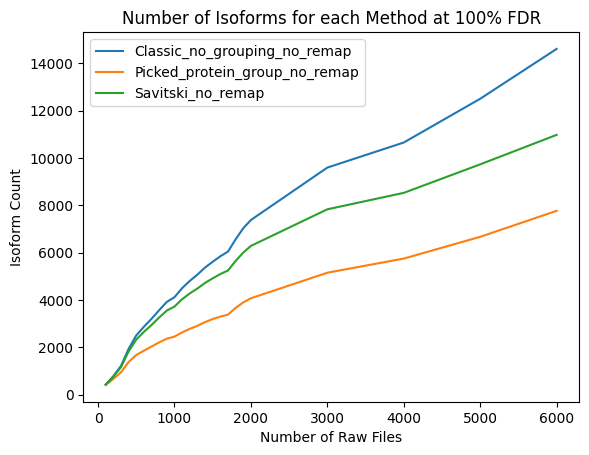

In [20]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/Isoform_Counts_Right_Order.csv')

# Extract the Method and Number of Raw Files from the file name
df['Method'] = df['File Name'].apply(lambda x: x.split('_')[1:-2])
df['Method'] = df['Method'].apply(lambda x: '_'.join(x))
df['Number of Raw Files'] = df['File Name'].apply(lambda x: int(x.split('_')[-2][:-5]))

# Group the data by 'Method' and plot
grouped = df.groupby('Method')
for method, group in grouped:
    x = group['Number of Raw Files']
    y = group['Isoform Count']
    plt.plot(x, y, label=method)

# Add axis labels and legend
plt.xlabel('Number of Raw Files')
plt.ylabel('Isoform Count')
plt.legend()
plt.title('Number of Isoforms for each Method at 100% FDR')

# Show the plot
plt.show()

In [ ]:
#Analysis again

In [23]:
import pandas as pd
import os
import re

# set the directory where the CSV files are located
csv_dir = '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/CSV_Files_No_Separation/SeparateProteinIDs_No_Separation_ProteinGroups.output/'

# read in the human proteome csv file
human_proteome_csv = pd.read_csv(os.path.join(csv_dir, '/Users/anabelyong/miniconda3/lib/python3.10/site-packages/jupyterlab/Subset750RawfilesCut/Uniprot_Human_Proteome.csv'))

# create an empty dataframe to store unmerged rows and isoforms
all_unmerged_csv = pd.DataFrame(columns=['Protein Uniprot'])

# loop through all CSV files in the directory
for csv_file in os.listdir(csv_dir):
    if csv_file.endswith('.csv') and csv_file != 'Uniprot_Human_Proteome.csv':
        # read in the CSV file
        csv = pd.read_csv(os.path.join(csv_dir, csv_file))
        
        # merge the CSV file with the human proteome csv file on the 'Protein Uniprot' column
        merged_csv = pd.merge(csv, human_proteome_csv, on='Protein Uniprot', how='outer', indicator=True)
        
        # filter to only include rows where _merge is left_only
        unmerged_csv = merged_csv[merged_csv['_merge'] == 'left_only']
        
        # extract the names of isoforms using str.extractall and add them to the isoforms list
        isoforms = unmerged_csv['Protein Uniprot'].str.extractall(r'(\w+-\d+)').iloc[:, 0].tolist()
        
        isoform_count = len(isoforms)
        unique_isoforms = set(isoforms)

        print(f'For {csv_file}:')
        print(f'Total number of isoforms: {isoform_count}')
        print(f'Unique isoforms: {unique_isoforms}')
        
        # save the unmerged rows to a new CSV file
        unmerged_csv.to_csv(os.path.join(csv_dir, csv_file.replace('.csv', '_unmerged.csv')), index=False)

For SeparateProteinIDs_Picked_protein_group_no_remap_2000Files_withScore.csv:
Total number of isoforms: 4067
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'Q86XX4-4', 'P43121-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9H172-4', 'Q96J94-3', 'Q6TFL3-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95214-2', 'Q14BN4-4', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O60333-2', 'O15084-2', 'Q14524-5', 'Q9NX78-2', 'Q9Y215-6', 'Q6WRX3-2', 'P0DTL6-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q02224-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'P45984-5', 'Q96LC7-3', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'Q9UBS5-3', 'O75771-6', 'P19544-7', 'P98198-3', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q4G0X9-5', 'Q8IXL7-2', 'Q8WWT9-4', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q1

For SeparateProteinIDs_Savitski_no_remap_1200Files_withScore.csv:
Total number of isoforms: 4271
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q9UL16-2', 'Q96RF0-3', 'Q8

For SeparateProteinIDs_Picked_protein_group_no_remap_1800FIles_withScore.csv:
Total number of isoforms: 3661
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'P43121-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9H172-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O60333-2', 'O15084-2', 'Q6WRX3-2', 'Q9NX78-2', 'Q9Y215-6', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q4G0X9-5', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8N1S5-2', 'Q9NQA5-2', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8

For SeparateProteinIDs_Classic_no_grouping_no_remap_200Files_withScore.csv:
Total number of isoforms: 775
Unique isoforms: {'Q9H7T0-2', 'Q96LX7-5', 'P60660-2', 'A0A1B0GVS7-2', 'P50851-2', 'Q14318-2', 'Q96JN0-3', 'Q01113-3', 'Q8IY67-2', 'Q401N2-3', 'Q8WXC6-1', 'Q9P2M1-2', 'Q5W0U4-2', 'Q01543-2', 'A0PJY2-3', 'P09496-3', 'Q66K74-2', 'Q8NF91-9', 'Q9H0P0-1', 'Q6ZMN7-4', 'Q96QU1-6', 'Q6ZQW0-2', 'Q8TAP4-3', 'Q96H22-2', 'Q5VZ19-2', 'P47736-3', 'Q13495-3', 'Q33E94-4', 'Q8NCT3-6', 'Q8WTV1-4', 'Q86WI3-3', 'Q3ZCV2-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q9H074-3', 'O15539-2', 'O75461-2', 'Q0VDD8-3', 'P29692-2', 'A9Z1Z3-4', 'P17542-2', 'P67812-3', 'Q9NQW5-2', 'Q5T8P6-2', 'Q8IV35-2', 'P17010-2', 'Q00325-2', 'Q8IXL7-2', 'Q8NEZ3-2', 'Q9UKJ3-3', 'Q9NWV8-2', 'Q969F9-2', 'O00744-2', 'P40855-6', 'Q9Y446-2', 'Q01082-3', 'Q9P206-2', 'Q3KRA9-3', 'Q5JPI3-2', 'Q96KP6-3', 'O43324-2', 'Q8N307-3', 'Q96PE1-2', 'P28335-2', 'Q96PV0-3', 'Q96CW1-2', 'Q9NVL1-2', 'Q92879-5', 'P49368-2', 'Q86SQ6-1', 'Q9H6L2-2', 'Q13972-2', 'Q7RTR2-

For SeparateProteinIDs_Savitski_no_remap_1700Files_withScore.csv:
Total number of isoforms: 5239
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'P51878-5', 'Q8IZ41-2', 'Q9P2N2-2', 'Q14439-2', 'Q68G75-6', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'Q96B96-2', 'Q9UBT6-2', 'Q9H0V9-2', 'Q9NTX7-2', 'Q9HCE1-3', 'A8K0R7-5', 'Q96P44-2', 'P57103-5', 'Q8NCV1-2', 'P55259-3', 'P19

For SeparateProteinIDs_Classic_no_grouping_no_remap_700Files_withScore.csv:
Total number of isoforms: 3199
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q04671-3', 'P10242-10', 'P01100-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'O14713-2', 'Q5JPI3-2', 'Q2V2M9-4', 'Q6ZUS6-5', 'P13497-4', 'Q8ND

For SeparateProteinIDs_Savitski_no_remap_2000Files_withScore.csv:
Total number of isoforms: 6279
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'P41223-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'Q969W3-2', 'P51878-5', 'Q8IZ41-2', 'Q6NUS6-5', 'Q9P2N2-2', 'Q14439-2', 'P78410-3', 'Q68G75-6', 'P22736-2', 'Q9H7H0-3', 'A8M

For SeparateProteinIDs_Picked_protein_group_no_remap_1200Files_withScore.csv:
Total number of isoforms: 2774
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'O60313-2', 'P50851-2', 'P43121-2', 'Q14318-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'O15350-9', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'P22694-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'Q8N961-2', 'O60879-2', 'Q96H22-3', 'Q6ZV65-2', 'Q9NR11-2', 'Q70YC5-4', 'P49368-2', 'P36402-4', 'O00445-2', 'Q5VVJ2-3', 'Q8

For SeparateProteinIDs_Picked_protein_group_no_remap_1700Files_withScore.csv:
Total number of isoforms: 3374
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'P43121-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9H172-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O60333-2', 'O15084-2', 'Q6WRX3-2', 'Q9NX78-2', 'Q9Y215-6', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8N1S5-2', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'Q8

For SeparateProteinIDs_Savitski_no_remap_900FIles_withScore.csv:
Total number of isoforms: 3548
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'O14

For SeparateProteinIDs_Classic_no_grouping_no_remap_1100Files_withScore.csv:
Total number of isoforms: 4494
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'Q96LX7-5', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q9UL16-2', 'Q96RF0-3', 'Q8I

For SeparateProteinIDs_Classic_no_grouping_no_remap_5000Files_withScore.csv:
Total number of isoforms: 12496
Unique isoforms: {'O43670-3', 'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'Q9C0H6-2', 'Q13574-7', 'P49758-16', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'P48059-4', 'Q9H8V3-3', 'Q96J94-3', 'O43913-2', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q96PV7-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q9Y215-3', 'Q16643-3', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9H6X5-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9U

For SeparateProteinIDs_Classic_no_grouping_no_remap_1400Files_withScore.csv:
Total number of isoforms: 5365
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'Q13574-7', 'P43121-2', 'Q9BPX6-5', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43

For SeparateProteinIDs_Savitski_no_remap_6000Files_withScore.csv:
Total number of isoforms: 10970
Unique isoforms: {'O43670-3', 'Q96LX7-5', 'A0A1B0GVS7-2', 'Q4LE39-2', 'Q9NQQ7-3', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'Q9C0H6-2', 'Q13574-7', 'P49758-16', 'Q07890-2', 'A8K2U0-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'P48059-4', 'Q96RK4-2', 'Q9H8V3-3', 'Q96J94-3', 'O43913-2', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9ULJ3-2', 'Q96PV7-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q9Y215-3', 'Q16643-3', 'Q8TDF5-1', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q6ZN01-3', 'Q9H2D6-2', 'Q9BZP3-3', 'P08621-3', 'Q9BW11-4', 'Q8N961-2', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9

For SeparateProteinIDs_Savitski_no_remap_1900Files_withScore.csv:
Total number of isoforms: 5998
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'P41223-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'Q969W3-2', 'P51878-5', 'Q8IZ41-2', 'Q6NUS6-5', 'Q9P2N2-2', 'Q14439-2', 'P78410-3', 'Q68G75-6', 'P22736-2', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'P53

For SeparateProteinIDs_Classic_no_grouping_no_remap_900Files_withScore.csv:
Total number of isoforms: 3913
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1

For SeparateProteinIDs_Savitski_no_remap_800Files_withScore.csv:
Total number of isoforms: 3254
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P28472-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'P10242-10', 'P01100-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'O14713-2', 'Q5JPI3-2', 'Q2V

For SeparateProteinIDs_Picked_protein_group_no_remap_900Files_withScore.csv:
Total number of isoforms: 2360
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'P50851-2', 'P43121-2', 'Q14318-2', 'P24530-3', 'P35348-6', 'P11464-4', 'Q01543-2', 'Q9BQK8-2', 'Q8NF91-9', 'Q86TP1-5', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q8IWZ3-6', 'Q13402-8', 'Q14192-2', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'O60879-2', 'Q96H22-3', 'Q6ZV65-2', 'Q9NR11-2', 'Q70YC5-4', 'P49368-2', 'Q8NEY1-5', 'P36402-4', 'Q7LFL8-2', 'Q5VVJ2-3', 'Q8NCX0-2', 'Q96A59-3', 'Q9NQW8-2', 'O75122-3', 'Q9NX94-2', 'Q6IPM2-2', 'Q76KX8-2', 'P04085-2', 'P48067-2', 'Q8IUR7-6', 'Q96I

For SeparateProteinIDs_Classic_no_grouping_no_remap_3000Files_withScore.csv:
Total number of isoforms: 9588
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'P49758-16', 'Q13574-7', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'Q9H8V3-3', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'O15204-2', 'Q96D71-2', 'P42892-2', 'Q8N443-3', 'P155

For SeparateProteinIDs_Picked_protein_group_no_remap_1900FIles_withScore.csv:
Total number of isoforms: 3891
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'Q86XX4-4', 'P43121-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q9H172-4', 'Q96J94-3', 'Q6TFL3-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O60333-2', 'O15084-2', 'Q14524-5', 'Q9NX78-2', 'Q9Y215-6', 'Q6WRX3-2', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'Q96LC7-3', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'P98198-3', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q4G0X9-5', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8

For SeparateProteinIDs_Classic_no_grouping_no_remap_300Files_withScore.csv:
Total number of isoforms: 1209
Unique isoforms: {'Q9H7T0-2', 'P78358-2', 'P60660-2', 'A0A1B0GVS7-2', 'Q8IZ96-14', 'Q07812-6', 'Q96LX7-5', 'Q7Z7G0-4', 'P50851-2', 'P43121-2', 'Q14318-2', 'Q96JN0-3', 'Q01113-3', 'Q3SXY7-2', 'Q86XL3-3', 'Q8IY67-2', 'Q7Z304-2', 'Q9NZC7-6', 'Q6IWH7-2', 'Q8WXC6-1', 'Q401N2-3', 'Q9P2M1-2', 'P81877-4', 'P04406-2', 'Q5W0U4-2', 'Q9H1B4-6', 'Q96MT7-1', 'Q08722-3', 'Q01543-2', 'A0PJY2-3', 'P09496-3', 'Q66K74-2', 'Q8NF91-9', 'Q9H0P0-1', 'Q3ZCX4-3', 'Q96QU1-6', 'Q6ZMN7-4', 'Q8TAP4-3', 'Q96H22-2', 'Q9H9B1-2', 'P47736-3', 'Q13495-3', 'Q33E94-4', 'Q5VZ19-2', 'Q8NCT3-6', 'O15375-2', 'Q8WTV1-4', 'Q86WI3-3', 'Q3ZCV2-2', 'O15084-2', 'Q8TBY8-1', 'Q9NX78-2', 'Q8NCC5-3', 'Q8WWR9-2', 'Q9H074-3', 'Q6ISS4-2', 'O15539-2', 'Q9Y371-2', 'Q9NZM1-3', 'O75461-2', 'Q0VDD8-3', 'Q8TED0-3', 'P13232-3', 'Q9UN36-3', 'P29692-2', 'A9Z1Z3-4', 'O00422-2', 'O75771-6', 'P67812-3', 'P17542-2', 'O60573-2', 'Q9NQW5-2', 'Q86VB

For SeparateProteinIDs_Picked_protein_group_no_remap_6000Files_withScore.csv:
Total number of isoforms: 7761
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q9H2X0-2', 'Q13574-7', 'P35348-6', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q9ULJ3-2', 'Q96PV7-3', 'Q8TAX9-1', 'O60907-2', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q2VPA4-3', 'P07202-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'O75771-6', 'Q01860-2', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q8IXL7-2', 'O60271-9', 'Q9Y215-3', 'P62633-6', 'Q8TDF5-1', 'O00469-2', 'O76081-3', 'Q8N4L8-2', 'Q6ZN01-3', 'Q9H2D6-2', 'Q9BZP3-3', 'P08621-3', 'Q9BW11-4', 'Q8N961-2', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9H6X5-2', 'Q9Y303-2', 'Q9NXL9-2', 'Q86X27-3', 'Q9UBQ7-2', 'Q8IUR7-6', 'Q9NYF5-3', 'Q13239-5', 'Q13007-4', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'Q8TEH3-2', 'P19021-3', 'P42892-2', 'Q96D71-2', 'P46087-3', 'Q8N443-3', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q03001-11', 'Q96PS8-2', 'Q6AZY7-2', 'Q68D91-2', 'Q8N

For SeparateProteinIDs_Savitski_no_remap_1300Files_withScore.csv:
Total number of isoforms: 4479
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8WWT9-4', 'Q9

For SeparateProteinIDs_Picked_protein_group_no_remap_300Files_withScore.csv:
Total number of isoforms: 936
Unique isoforms: {'Q9H7T0-2', 'P78358-2', 'P60660-2', 'A0A1B0GVS7-2', 'Q8IZ96-14', 'Q07812-6', 'Q96LX7-5', 'Q7Z7G0-4', 'P50851-2', 'P43121-2', 'Q14318-2', 'Q96JN0-3', 'Q01113-3', 'Q3SXY7-2', 'Q8IY67-2', 'Q7Z304-2', 'Q9NZC7-6', 'Q6IWH7-2', 'Q8WXC6-1', 'Q401N2-3', 'Q9P2M1-2', 'Q7Z589-7', 'P04406-2', 'Q5W0U4-2', 'Q9H1B4-6', 'P81877-4', 'Q01543-2', 'Q8NF91-9', 'Q9H0P0-1', 'Q3ZCX4-3', 'Q6ZMN7-4', 'Q6ZQW0-2', 'Q8TAP4-3', 'Q96H22-2', 'Q9H9B1-2', 'Q5VZ19-2', 'Q13495-3', 'P23229-9', 'Q33E94-4', 'Q9BX66-9', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'Q8WTV1-4', 'Q86WI3-3', 'Q9NX78-2', 'Q6P2M8-6', 'Q8NCC5-3', 'Q8WWR9-2', 'Q9H074-3', 'Q6ISS4-2', 'Q10567-3', 'Q9Y371-2', 'O15539-2', 'O75461-2', 'Q0VDD8-3', 'P13232-3', 'P29692-2', 'A9Z1Z3-4', 'Q13642-1', 'P17542-2', 'O60573-2', 'Q9NQW5-2', 'Q86VB7-4', 'Q5T8P6-2', 'Q8IV35-2', 'O43251-8', 'P17010-2', 'Q00325-2', 'P10242-10', 'P35348-4', 'Q8IXL7-2', 'Q8NE

For SeparateProteinIDs_Savitski_no_remap_200Files_withScore.csv:
Total number of isoforms: 748
Unique isoforms: {'Q9H7T0-2', 'Q96LX7-5', 'P60660-2', 'A0A1B0GVS7-2', 'P50851-2', 'Q14318-2', 'Q96JN0-3', 'Q01113-3', 'Q8IY67-2', 'Q401N2-3', 'Q8WXC6-1', 'Q9P2M1-2', 'Q5W0U4-2', 'Q01543-2', 'A0PJY2-3', 'P09496-3', 'Q66K74-2', 'Q8NF91-9', 'Q9H0P0-1', 'Q6ZMN7-4', 'Q96QU1-6', 'Q6ZQW0-2', 'Q8TAP4-3', 'Q96H22-2', 'Q5VZ19-2', 'P47736-3', 'Q13495-3', 'Q33E94-4', 'Q8NCT3-6', 'Q8WTV1-4', 'Q86WI3-3', 'Q3ZCV2-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q9H074-3', 'O15539-2', 'O75461-2', 'Q0VDD8-3', 'P29692-2', 'A9Z1Z3-4', 'P17542-2', 'P67812-3', 'Q9NQW5-2', 'Q5T8P6-2', 'Q8IV35-2', 'P17010-2', 'Q00325-2', 'Q8IXL7-2', 'Q8NEZ3-2', 'Q9UKJ3-3', 'Q9NWV8-2', 'Q969F9-2', 'O00744-2', 'P40855-6', 'Q9Y446-2', 'Q01082-3', 'Q9P206-2', 'Q3KRA9-3', 'Q5JPI3-2', 'Q96KP6-3', 'O43324-2', 'Q8N307-3', 'Q96PE1-2', 'P28335-2', 'Q96PV0-3', 'Q96CW1-2', 'Q9NVL1-2', 'Q92879-5', 'P49368-2', 'Q86SQ6-1', 'Q9H6L2-2', 'Q13972-2', 'Q7RTR2-4', 'O94979

For SeparateProteinIDs_Savitski_no_remap_1600Files_withScore.csv:
Total number of isoforms: 5090
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'P51878-5', 'Q8IZ41-2', 'Q9P2N2-2', 'Q14439-2', 'Q68G75-6', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'Q96B96-2', 'Q9UBT6-2', 'Q9H0V9-2', 'Q9NTX7-2', 'Q9HCE1-3', 'A8K0R7-5', 'Q96P44-2', 'P57103-5', 'Q8NCV1-2', 'P55259-3', 'P19

For SeparateProteinIDs_Savitski_no_remap_4000Files_withScore.csv:
Total number of isoforms: 8520
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'P49758-16', 'Q13574-7', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'Q9H8V3-3', 'O43913-2', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9H6X5-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9UBQ7-2', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'O15

For SeparateProteinIDs_Classic_no_grouping_no_remap_1500Files_withScore.csv:
Total number of isoforms: 5609
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'Q9BPX6-5', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q9H172-4', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9NS87-2', 'P49790-3', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'O94827-7', 'Q9UNS2-2', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'Q9H6J7-2', 'Q9H1H9-3', 'Q6UWU4-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'Q8N9A8-2', 'O757

For SeparateProteinIDs_Picked_protein_group_no_remap_4000Files_withScore.csv:
Total number of isoforms: 5743
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q9H2X0-2', 'Q13574-7', 'P35348-6', 'O15534-4', 'O95214-2', 'Q8TAX9-1', 'O60907-2', 'Q9H4L5-8', 'Q8WXA2-2', 'P0DTL6-4', 'Q2VPA4-3', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'Q96LC7-3', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q9BZ71-2', 'Q4G0X9-5', 'Q8IXL7-2', 'O60271-9', 'O00469-2', 'O76081-3', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9H6X5-2', 'Q9Y303-2', 'Q9UBQ7-2', 'Q8IUR7-6', 'Q03060-30', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'O15204-2', 'Q8TEH3-2', 'P19021-3', 'P42892-2', 'P46087-3', 'Q8N443-3', 'Q96JY6-2', 'O43435-3', 'Q03001-11', 'Q96PS8-2', 'Q68D91-2', 'O60880-5', 'Q6UY01-4', 'Q13342-2', 'Q969W3-2', 'Q9BYH1-3', 'P51878-5', 'Q01105-4', 'Q8IZ41-2', 'Q9P2N2-2', 'Q68G75-6', 'P22736-2', 'A8MW92-4', 'Q5T0U0-2', 'Q9

For SeparateProteinIDs_Savitski_no_remap_3000Files_withScore.csv:
Total number of isoforms: 7825
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'P49758-16', 'Q13574-7', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'Q9H8V3-3', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'O15204-2', 'Q96D71-2', 'P42892-2', 'Q8N443-3', 'P15509-5', 'Q8I

For SeparateProteinIDs_Classic_no_grouping_no_remap_1900Files_withScore.csv:
Total number of isoforms: 7026
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'P41223-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'Q969W3-2', 'P51878-5', 'Q8IZ41-2', 'Q6NUS6-5', 'Q9P2N2-2', 'Q14439-2', 'P78410-3', 'Q68G75-6', 'P22736-2', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0

For SeparateProteinIDs_Classic_no_grouping_no_remap_6000Files_withScore.csv:
Total number of isoforms: 14602
Unique isoforms: {'O43670-3', 'Q96LX7-5', 'A0A1B0GVS7-2', 'Q4LE39-2', 'Q9NQQ7-3', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'Q9C0H6-2', 'Q13574-7', 'P49758-16', 'Q07890-2', 'A8K2U0-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'P48059-4', 'Q96RK4-2', 'Q9H8V3-3', 'Q96J94-3', 'O43913-2', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9ULJ3-2', 'Q96PV7-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q9Y215-3', 'Q16643-3', 'Q8TDF5-1', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q6ZN01-3', 'Q9H2D6-2', 'Q9BZP3-3', 'P08621-3', 'Q9BW11-4', 'Q8N961-2', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z

For SeparateProteinIDs_Classic_no_grouping_no_remap_1600Files_withScore.csv:
Total number of isoforms: 5841
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'Q9UNS2-2', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'P51878-5', 'Q8IZ41-2', 'Q9P2N2-2', 'Q14439-2', 'Q68G75-6', 'Q9H7H0-3', 'A8MW92-4', 'Q5T0U0-2', 'Q96B96-2', 'Q9UBT6-2', 'Q9H0V9-2', 'Q9NTX7-2', 'Q9HCE1-3', 'A8K0R7-5', 'Q96P44-2', 'P57103-5', 'Q8NCV1-2', 'P552

For SeparateProteinIDs_Picked_protein_group_no_remap_3000Files_withScore.csv:
Total number of isoforms: 5146
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'Q13574-7', 'P35348-6', 'O15534-4', 'O60907-2', 'Q9H4L5-8', 'Q8WXA2-2', 'P0DTL6-4', 'Q2VPA4-3', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'Q96LC7-3', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q4G0X9-5', 'Q8IXL7-2', 'O60271-9', 'O00469-2', 'O76081-3', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9UDW1-2', 'Q8IUR7-6', 'Q03060-30', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'O15204-2', 'Q8TEH3-2', 'P42892-2', 'Q8N443-3', 'Q96JY6-2', 'O43435-3', 'Q03001-11', 'Q96PS8-2', 'Q68D91-2', 'O60880-5', 'Q6UY01-4', 'Q13342-2', 'Q9BYH1-3', 'P51878-5', 'Q01105-4', 'Q8IZ41-2', 'Q9P2N2-2', 'Q68G75-6', 'P22736-2', 'A8MW92-4', 'Q5T0U0-2', 'Q9UBT6-2', 'Q9HCE6-4', 'A8K0R7-5', 'Q96P44-2', 'P57103-5', 'Q8NCV1-2', 'Q9

For SeparateProteinIDs_Classic_no_grouping_no_remap_1300Files_withScore.csv:
Total number of isoforms: 5065
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8W

For SeparateProteinIDs_Classic_no_grouping_no_remap_4000Files_withScore.csv:
Total number of isoforms: 10647
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'P49758-16', 'Q13574-7', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'Q9H8V3-3', 'O43913-2', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9H6X5-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9UBQ7-2', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'Q9NYF5-3', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z

For SeparateProteinIDs_Savitski_no_remap_1500Files_withScore.csv:
Total number of isoforms: 4908
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'Q9H2X0-2', 'O15394-2', 'Q14318-2', 'Q13574-7', 'Q6H3X3-3', 'Q9BPX6-5', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q9H172-4', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9NS87-2', 'P49790-3', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'O94827-7', 'Q9UNS2-2', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'Q9H6J7-2', 'Q9H1H9-3', 'Q6UWU4-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'Q8N9A8-2', 'O75771-6', 'O60

For SeparateProteinIDs_Picked_protein_group_no_remap_500Files_withScore.csv:
Total number of isoforms: 1668
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'P35348-6', 'Q01543-2', 'Q9NPH0-2', 'Q8NF91-9', 'Q86TP1-5', 'Q6ZMN7-4', 'Q96H22-2', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'Q8WWR9-2', 'Q10567-3', 'Q8IZD2-5', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'Q9NQW5-2', 'P10242-10', 'Q8IXL7-2', 'Q8IWZ3-6', 'Q13402-8', 'Q14192-2', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q9Y4I1-3', 'P14859-6', 'Q9BYB0-3', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'Q6ZV65-2', 'P49368-2', 'P36402-4', 'Q7LFL8-2', 'Q5VVJ2-3', 'Q9H6L2-2', 'O75122-3', 'Q9NX94-2', 'Q6PGN9-3', 'P04085-2', 'Q9UHX1-5', 'Q8IUR7-6', 'Q5VWK5-7', 'P53370-2', 'Q13239-5', 'P16471-9', 'P43403-3', 'Q8WXS8-3', 'Q6A555-2', 'C9JBD0-2', 'A0FGR8-6', 'Q96C03-2', 'P15509-5', 'Q03001-11', 'P38405-3', 'P30793-4', 'Q5H8C1-4', 'O43242-2', 'P22557-4', 'Q6P4F1-7', 'Q9H156-2', 'Q9B

For SeparateProteinIDs_Savitski_no_remap_1000FIles_withScore.csv:
Total number of isoforms: 3716
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'Q96LX7-5', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q9UL16-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q1

For SeparateProteinIDs_Picked_protein_group_no_remap_1000Files_withScore.csv:
Total number of isoforms: 2447
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P28472-2', 'O60313-2', 'P50851-2', 'P43121-2', 'Q14318-2', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q01543-2', 'Q9BQK8-2', 'Q8NF91-9', 'Q86TP1-5', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'Q96RD9-3', 'Q8IZD2-5', 'P58335-4', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'Q04671-3', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'Q13402-8', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'O60879-2', 'Q96H22-3', 'Q6ZV65-2', 'Q9NR11-2', 'Q70YC5-4', 'P49368-2', 'Q8NEY1-5', 'P36402-4', 'Q7LFL8-2', 'Q5VVJ2-3', 'Q8NCX0-2', 'Q96A59-3', 'O75122-3', 'Q9

For SeparateProteinIDs_Classic_no_grouping_no_remap_1200Files_withScore.csv:
Total number of isoforms: 4800
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'P43121-2', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q9UL16-2', 'Q96

For SeparateProteinIDs_Classic_no_grouping_no_remap_2000Files_withScore.csv:
Total number of isoforms: 7374
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q9H2X0-2', 'Q13574-7', 'Q9NTN3-2', 'P35348-6', 'Q96J94-3', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q9H4L5-8', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q2V2M9-4', 'Q8N4L8-2', 'Q8N961-2', 'P08621-3', 'Q9BW11-4', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9Y6M7-5', 'P52569-2', 'Q8IUR7-6', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'P42892-2', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q9Y426-3', 'Q03001-11', 'Q9H3E2-2', 'P41223-2', 'O75473-2', 'O60880-5', 'Q6UY01-4', 'O95243-5', 'Q13342-2', 'Q05397-5', 'Q969W3-2', 'P51878-5', 'Q8IZ41-2', 'Q6NUS6-5', 'Q9P2N2-2', 'Q14439-2', 'P78410-3', 'Q68G75-6', 'P22736-2', 'Q9H7

For SeparateProteinIDs_Picked_protein_group_no_remap_1400Files_withScore.csv:
Total number of isoforms: 3059
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'O60313-2', 'P28472-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'Q13574-7', 'P24530-3', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96J94-3', 'Q9BQK8-2', 'Q8NF91-9', 'O95260-2', 'Q96H22-2', 'Q9NPH5-5', 'Q0P651-3', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'O15350-9', 'Q8WWR9-2', 'Q8NHY6-2', 'Q10567-3', 'P14921-4', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'P22694-2', 'Q9HBE4-2', 'Q86SQ4-4', 'Q13642-1', 'O75771-6', 'P19544-7', 'Q01860-2', 'Q9NQW5-2', 'Q6N069-5', 'O94929-3', 'P10242-10', 'P01100-2', 'O43593-2', 'Q8IXL7-2', 'Q9UL16-2', 'Q8IWZ3-6', 'O60271-9', 'Q13402-8', 'Q3SXZ7-3', 'Q14192-2', 'Q9H9P5-3', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q8IZ21-4', 'Q6ZUS6-5', 'P14859-6', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'Q8N961-2', 'Q96H22-3', 'Q6ZV65-2', 'Q9

For SeparateProteinIDs_Picked_protein_group_no_remap_5000Files_withScore.csv:
Total number of isoforms: 6663
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q9H2X0-2', 'Q13574-7', 'P35348-6', 'Q96J94-3', 'O15534-4', 'O95214-2', 'Q96PV7-3', 'Q8TAX9-1', 'O60907-2', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q2VPA4-3', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'Q96LC7-3', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q8IXL7-2', 'O60271-9', 'Q9Y215-3', 'P62633-6', 'O00469-2', 'O76081-3', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q9H6X5-2', 'Q9Y303-2', 'Q9UBQ7-2', 'Q8IUR7-6', 'Q9NYF5-3', 'Q13007-4', 'P43403-3', 'Q6A555-2', 'Q9C035-3', 'Q7Z3J3-2', 'Q8TEH3-2', 'P19021-3', 'P42892-2', 'Q96D71-2', 'P46087-3', 'Q8N443-3', 'P15509-5', 'Q96JY6-2', 'O43435-3', 'Q03001-11', 'Q96PS8-2', 'Q68D91-2', 'O60880-5', 'Q6UY01-4', 'Q13342-2', 'Q969W3-2', 'P51878-5', 'Q9BYH1-3', 'Q01

For SeparateProteinIDs_Savitski_no_remap_1400Files_withScore.csv:
Total number of isoforms: 4715
Unique isoforms: {'Q96LX7-5', 'A0A1B0GVS7-2', 'P78358-2', 'P28472-2', 'P50851-2', 'O15394-2', 'Q6H3X3-3', 'Q14318-2', 'Q13574-7', 'P43121-2', 'Q9BPX6-5', 'Q6UXI9-3', 'P24530-3', 'Q9NTN3-2', 'Q6PL18-2', 'P35348-6', 'O75923-15', 'P11464-4', 'Q96LZ7-2', 'Q9UIL1-3', 'Q01543-2', 'Q96J94-3', 'Q6TFL3-3', 'Q9NPH0-2', 'P43251-2', 'Q9BQK8-2', 'Q8N7W2-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q9NPH5-5', 'Q0P651-3', 'Q7L2H7-2', 'Q9H4L5-8', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q6WRX3-2', 'Q9NWZ5-2', 'O15084-2', 'Q9NX78-2', 'Q9Y215-6', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8NHY6-2', 'P14921-4', 'Q07002-3', 'P16333-2', 'Q9BXT4-3', 'Q96RD9-3', 'Q8IZD2-5', 'Q5BKY9-2', 'Q9H6J7-2', 'Q9UN36-3', 'P22694-2', 'P58335-4', 'Q9HBE4-2', 'O75771-6', 'O60573-2', 'Q01860-2', 'Q04671-3', 'Q9NQW5-2', 'Q6N069-5', 'P10242-10', 'P01100-2', 'O43593-2', 'Q9

For SeparateProteinIDs_Picked_protein_group_no_remap_100Files_withScore.csv:
Total number of isoforms: 405
Unique isoforms: {'A0A1B0GVS7-2', 'P50851-2', 'Q96JN0-3', 'Q01113-3', 'Q8IY67-2', 'Q401N2-3', 'A0PJY2-3', 'Q9H0P0-1', 'P47736-3', 'P23229-9', 'Q9BX66-9', 'Q8NCT3-6', 'Q8WTV1-4', 'Q86WI3-3', 'Q8WWR9-2', 'Q9H074-3', 'Q8N2F6-6', 'Q10567-3', 'O75461-2', 'Q0VDD8-3', 'P29692-2', 'Q13642-1', 'Q9NQW5-2', 'Q5T8P6-2', 'O43251-8', 'Q8IXL7-2', 'P49281-5', 'Q8NEZ3-2', 'O00744-2', 'O14787-2', 'P40855-6', 'Q5T8P6-3', 'Q01082-3', 'P14859-6', 'O43324-2', 'Q96PV0-3', 'Q96CW1-2', 'Q92851-6', 'Q9NVL1-2', 'P06753-2', 'P49368-2', 'Q8WXA9-2', 'Q6ZMP0-3', 'O75122-3', 'Q9H1X3-3', 'O15054-1', 'Q14155-5', 'P04085-2', 'Q9P2D7-6', 'P09493-5', 'Q8N3V7-2', 'Q13555-5', 'P16615-4', 'Q9HCM4-2', 'A0FGR8-6', 'Q7Z6L0-2', 'P22314-2', 'P38405-3', 'Q7Z6Z6-2', 'Q5H8C1-4', 'P49407-2', 'P32418-4', 'O60941-5', 'Q9Y572-3', 'P17096-2', 'Q96AE4-2', 'O95990-2', 'P19174-2', 'Q8TDG4-5', 'P09493-9', 'Q9H4G0-2', 'P23142-4', 'Q8NBI6

For SeparateProteinIDs_Savitski_no_remap_500Files_withScore.csv:
Total number of isoforms: 2322
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'Q96LX7-5', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'P35348-6', 'Q9UIL1-3', 'Q01543-2', 'Q9NPH0-2', 'Q66K74-2', 'Q8NF91-9', 'Q6ZMN7-4', 'Q9H974-3', 'O95260-2', 'Q96H22-2', 'P29376-4', 'Q7L2H7-2', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'O15084-2', 'Q9NWZ5-2', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'P54687-4', 'Q8WWR9-2', 'Q8IZD2-5', 'Q9UN36-3', 'P58335-4', 'O75771-6', 'O60573-2', 'Q9NQW5-2', 'P10242-10', 'Q8IXL7-2', 'O95218-2', 'Q96RF0-3', 'Q8IWZ3-6', 'Q9NXA8-4', 'Q13402-8', 'Q969F9-2', 'Q14192-2', 'Q8WY36-3', 'Q9Y4I1-3', 'Q8N1S5-2', 'Q5JPI3-2', 'Q2V2M9-4', 'P13497-4', 'Q8NDA8-4', 'Q9BYB0-3', 'P28335-2', 'O15519-6', 'Q9BW11-4', 'O60879-2', 'Q6ZV65-2', 'P49368-2', 'Q13948-10', 'Q7LFL8-2', 'Q5VVJ2-3', 'Q8NCX0-2', 'Q9H6L2-2', 'Q9NS18-2', 'O75122-3', 'Q9Y303-2', 'Q9NX94-2', 'Q6PGN9-3', 'Q8TES7-6', 'Q5TCZ1-2', 'Q5SRE5-2', 'Q9Y2L1-2', 'P04

For SeparateProteinIDs_Savitski_no_remap_5000Files_withScore.csv:
Total number of isoforms: 9725
Unique isoforms: {'O43670-3', 'Q96LX7-5', 'A0A1B0GVS7-2', 'Q9NQQ7-3', 'P28472-2', 'Q6YHK3-2', 'Q99460-2', 'Q8TES7-5', 'Q9H2X0-2', 'Q9C0H6-2', 'Q13574-7', 'P49758-16', 'Q07890-2', 'Q9BZZ5-1', 'Q9NTN3-2', 'P35348-6', 'P48059-4', 'Q9H8V3-3', 'Q96J94-3', 'O43913-2', 'O15534-4', 'O95214-2', 'Q9NS87-2', 'P49790-3', 'Q96PV7-3', 'Q8TAX9-1', 'Q9H4L5-8', 'Q8WXA2-2', 'Q9NWZ5-2', 'P0DTL6-4', 'Q9UNS2-2', 'Q14722-2', 'Q7Z6G8-8', 'P16333-2', 'Q96RD9-3', 'Q92185-2', 'Q9UC07-2', 'P58335-4', 'Q8N9A8-2', 'O75771-6', 'O00429-7', 'Q01860-2', 'Q04671-3', 'Q2T9K0-6', 'Q6XPS3-7', 'Q9BZ71-2', 'Q4G0X9-5', 'Q9NXN4-2', 'Q8IXL7-2', 'O95218-2', 'Q8IWZ3-6', 'O60271-9', 'Q9Y215-3', 'Q16643-3', 'O76081-3', 'Q2V2M9-4', 'Q6NUQ4-2', 'Q8N4L8-2', 'Q9H2D6-2', 'Q9BZP3-3', 'Q8N961-2', 'Q9BW11-4', 'P08621-3', 'Q9H9A5-5', 'Q9ULQ1-2', 'Q9NQW8-2', 'Q7Z591-7', 'Q9H6X5-2', 'Q9Y303-2', 'Q5TCZ1-2', 'Q9UDW1-2', 'Q86X27-3', 'Q9UBQ7-2', 'Q9Y

For SeparateProteinIDs_Picked_protein_group_no_remap_400Files_withScore.csv:
Total number of isoforms: 1374
Unique isoforms: {'P78358-2', 'A0A1B0GVS7-2', 'P50851-2', 'O15394-2', 'P43121-2', 'Q14318-2', 'P35348-6', 'Q01543-2', 'Q9NPH0-2', 'Q8NF91-9', 'Q86TP1-5', 'Q6ZMN7-4', 'Q96H22-2', 'P29376-4', 'Q8NCT3-6', 'O15375-2', 'O75865-4', 'Q86WI3-3', 'Q9NX78-2', 'O94827-7', 'Q6N075-2', 'Q8WWR9-2', 'Q10567-3', 'P58335-4', 'Q13642-1', 'O75771-6', 'Q9NQW5-2', 'P10242-10', 'Q8IXL7-2', 'Q8IWZ3-6', 'Q13402-8', 'Q14192-2', 'Q8WY36-3', 'O00469-2', 'O94966-7', 'Q9Y4I1-3', 'P14859-6', 'Q9BYB0-3', 'Q8NDA8-4', 'P28335-2', 'O15519-6', 'Q6ZV65-2', 'P49368-2', 'P36402-4', 'Q7LFL8-2', 'Q9H6L2-2', 'Q9NS18-2', 'O75122-3', 'Q9NX94-2', 'Q6PGN9-3', 'P04085-2', 'Q8IUR7-6', 'Q13239-5', 'P43403-3', 'Q8WXS8-3', 'Q6A555-2', 'C9JBD0-2', 'A0FGR8-6', 'Q96C03-2', 'P15509-5', 'Q03001-11', 'P38405-3', 'P30793-4', 'Q5H8C1-4', 'P22557-4', 'Q58EX7-2', 'Q6P4F1-7', 'Q9H156-2', 'Q9BYP7-3', 'P00325-2', 'P78411-3', 'A1A4V9-4', 'Q8N